<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">Mame Diarra DABO, Kaouther Malika DECHICHA, Houda OUADAH </h1>  
<hr style="border-width:2px;border-color:#75DFC1">

## Objectif

Compléter l’approche GLM en testant des algorithmes de Machine Learning capables de mieux prédire la gravité des accidents, et interpréter leurs résultats grâce à des méthodes d’explicabilité.

## Méthodologie :

1. **Tester plusieurs modèles :** Random Forest, XGBoost, Gradient Boosting, KNN, SVM…, deux cibles ont été traitées (Classification binaire (Grave vs Non grave) et Classification multiclasse (grav à 4 modalités)).
2. **Évaluation des performances :** Accuracy, F1-score, ROC AUC (pour le binaire), confusion matrix.
3. **Interprétabilité :** SHAP et LIME.
4. **Conclusion.** 

# 1. Les packages

In [1]:
# importer les packages qu'on aura besoin 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# étapes de prétraitement
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# modèles et outils d'apprentissage automatique
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# 2. Importation des données

## 2.1 Gestion du repertoire

In [73]:
# Afficher le repertoire de travail
esp_env = os.getcwd()
print(esp_env)

C:\Users\diarr\Downloads\Projet tutorés


In [74]:
# Changer de repertoire
os.chdir("C:/Users/diarr/Downloads/Projet tutorés")

# Vérifier le repertoire actuel après changement
new_esp = os.getcwd()
print(new_esp)

C:\Users\diarr\Downloads\Projet tutorés


* Nous sommes dans le bon repertoire.

## 2.2 Chargement et lecture des données

In [75]:
# charger la base
df_final = pd.read_csv("df_final_accidents_corporels_2.csv", sep = ",")

# afficher le nombre maximum de colonnes
pd.set_option('display.max_columns', 40)

print(df_final.shape)
df_final.head(5)

(129163, 40)


Num_Acc  id_vehicule num_veh  place  catu  grav  sexe  an_nais  \
0  202100021165       163830     A01      9     2     4     1     1948   
1  202100020281       165383     A01      1     1     1     2     1965   
2  202100047336       117153     A01      1     1     4     2     1972   
3  202100008918       185779     B01      1     1     4     1     1985   
4  202100009175       185315     A01      1     1     3     1     1960   

   trajet  secu1  senc  catv  obsm  choc  manv  motor  dep  catr  circ  nbv  \
0       5      1     1     7     2     1     1      1  973   2.0   2.0  2.0   
1       1      1     1     7     2     3     9      1   49   4.0   1.0  1.0   
2       1      2     1    30     2     1     2      1   64   4.0   1.0  1.0   
3       9      8     1     1     2     7     2      5   74   3.0   2.0  2.0   
4       5      1     2     7     2     1    13      1   83   3.0   2.0  2.0   

   prof  plan  surf  situ   vma  jour  mois    an  lum    com  agg  int  atm  \
0   1.0   1.0   1.0   1.0  80.0     3     9  2021    3  97303    1    1    1   
1   1.0   2.0   1.0   1.0  50.0     2     9  2021    1  49099    2    6    1   
2   1.0   1.0   1.0   1.0  30.0    19     3  2021    1  64445    2    1    1   
3   1.0   1.0   1.0   1.0  50.0    31     5  2021    2  74010    2    6    1   
4   1.0   2.0   1.0   1.0  80.0     7    11  2021    1  83066    1    1    1   

   col       lat      long  age  grav_libelle  grave_binaire  heure  
0    1  48.02959  2.392522   73  Blessé léger              0     20  
1    2  47.05782 -0.887500   56       Indemne              0     18  
2    2  43.30446 -0.348950   49  Blessé léger              0     14  
3    3  45.90600  6.126100   36  Blessé léger              0     21  
4    1  43.63445  5.834148   61   Hospitalisé              1     13

In [76]:
# faire une copie
df = df_final.copy()

In [77]:
# Format des données
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129163 entries, 0 to 129162
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Num_Acc        129163 non-null  int64  
 1   id_vehicule    129163 non-null  int64  
 2   num_veh        129163 non-null  object 
 3   place          129163 non-null  int64  
 4   catu           129163 non-null  int64  
 5   grav           129163 non-null  int64  
 6   sexe           129163 non-null  int64  
 7   an_nais        129163 non-null  int64  
 8   trajet         129163 non-null  int64  
 9   secu1          129163 non-null  int64  
 10  senc           129163 non-null  int64  
 11  catv           129163 non-null  int64  
 12  obsm           129163 non-null  int64  
 13  choc           129163 non-null  int64  
 14  manv           129163 non-null  int64  
 15  motor          129163 non-null  int64  
 16  dep            129163 non-null  object 
 17  catr           129163 non-nul

# 3. Préparation des données pour la modélisation

**Visualisation de la variable cible**

In [78]:
# Afficher les modalités
print(df_final["grav"].value_counts(ascending=False))

grav
1    55143
4    51706
3    19093
2     3221
Name: count, dtype: int64


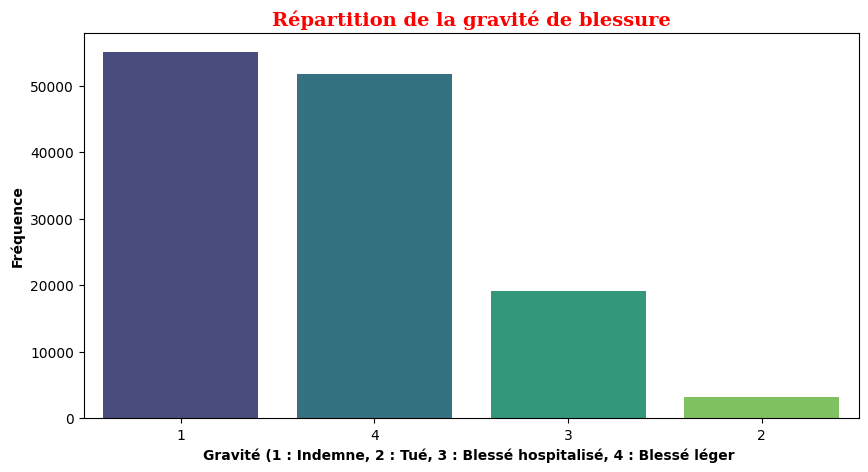

In [79]:
# Visualisation
font_title = {"family": "serif",
              "color":  "red",
              "weight": "bold",
              "size": 14}
plt.figure(figsize=(10,5)) 
sns.countplot(x = df_final["grav"], order = df_final["grav"].value_counts(ascending=False).index, data = df_final, palette ="viridis")
plt.xlabel("Gravité (1 : Indemne, 2 : Tué, 3 : Blessé hospitalisé, 4 : Blessé léger ", fontweight = "bold")
plt.ylabel("Fréquence", fontweight = "bold")
plt.title("Répartition de la gravité de blessure", fontdict=font_title)
plt.show()

### 3.1. Suppression des variables identifiants

In [80]:
# Suppression des colonnes
df_final = df_final.drop(columns = ["Num_Acc", "id_vehicule", "num_veh", "an", "grav_libelle", "grave_binaire", "an_nais"], axis  = 1)

### 3.2. Encodage des variables catégorielles

Pour la préparation des données pour un arbre de décision simple, nous allons faire du **LabelEncoder** car il ne sont pas sensible à l'échelle des variables.

In [81]:
# Encodage des variables catégorielles
label_encoders = {}
for col in df_final.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le

### 3.3. Séparation des données d'Entrainement, de validation et Test

In [82]:
# Définition des variables explicatives et de la cible
X = df_final.drop(columns = ["grav"], axis = 1)
X_bin = X.copy()

# Supprimer la cible originale
y = df_final["grav"]
y_bin = y.copy()

# Recaler les labels (y) pour commencer à 0
y_m = y - 1

**Pourquoi Recaler les labels (y) pour commencer à 0 ?**

* Certains classifieurs (comme XGBClassifier) infèrent automatiquement les classes à partir des valeurs de y.

* Ils s’attendent à ce que les classes soient consécutives à partir de 0, sinon ils lèvent une erreur comme ici.

In [83]:
# Vérification de VM
y_m.isna().sum()

0

In [84]:
# Séparation initiale : 80% entraînement + validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_m, test_size = 0.2, random_state=42)

# Séparation secondaire
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=42)

# Vérification des dimensions
print("Taille de X_train :", X_train.shape)
print("Taille de X_val   :", X_val.shape)
print("Taille de X_test  :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_val   :", y_val.shape)
print("Taille de y_test  :", y_test.shape)

Taille de X_train : (77497, 32)
Taille de X_val   : (25833, 32)
Taille de X_test  : (25833, 32)
Taille de y_train : (77497,)
Taille de y_val   : (25833,)
Taille de y_test  : (25833,)


* Apprentissage (train) : pour détecter du surapprentissage si c’est très haut par rapport à test/val

* Validation : pour affiner les hyperparamètres si besoin

* Test : pour évaluer la performance finale réelle

In [85]:
# Format des données
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77497 entries, 39784 to 59463
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   place   77497 non-null  int64  
 1   catu    77497 non-null  int64  
 2   sexe    77497 non-null  int64  
 3   trajet  77497 non-null  int64  
 4   secu1   77497 non-null  int64  
 5   senc    77497 non-null  int64  
 6   catv    77497 non-null  int64  
 7   obsm    77497 non-null  int64  
 8   choc    77497 non-null  int64  
 9   manv    77497 non-null  int64  
 10  motor   77497 non-null  int64  
 11  dep     77497 non-null  int32  
 12  catr    77497 non-null  float64
 13  circ    77497 non-null  float64
 14  nbv     77497 non-null  float64
 15  prof    77497 non-null  float64
 16  plan    77497 non-null  float64
 17  surf    77497 non-null  float64
 18  situ    77497 non-null  float64
 19  vma     77497 non-null  float64
 20  jour    77497 non-null  int64  
 21  mois    77497 non-null  int64  
 22 

### 3.4. Standardisation des données

* Le StandardScaler est une méthode de normalisation utilisée en machine learning pour mettre les données sur une échelle standard, ce qui est souvent nécessaire avant d’entraîner certains modèles.
*  Sans standardisation, une variable avec de grandes valeurs pourrait dominer les autres.

In [86]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

* Aprés les étapes de la préparation de données, nous allons passer maintenant à la modélisation des données en créant une dictionnaire de modèles qui nous semble pertinente pour pouvoir prédire le montenant des sinistres en fonction de différentes caractéristiques du conducteur, du véhicule.
* Ensuite évaluer nos modèles avec différents metrics.

# 4. Modélisation MULTICLASSE

* Nous allons commencer dabord à faire de la classification multiclasse avec notre variable cible **grav** qui à 4 classes ou modalités qui sont : Indemne, Tué, Blessé hospitalisé, Blessé léger afin d'évaluer les performances
* Ensuite faire de la classification binaire.
* L'objectif de ces deux modélisations c'est pour pouvoir comparer la performance de chacun des modèles afin d'en tirer des avantages et inconvenients.

In [16]:
# Essai de plusieurs algorithmes de machine learning
seed = 1234
algos_ml_classif = {
    "random_forest": {"model": RandomForestClassifier(random_state=seed)},
    "bagging": {"model": BaggingClassifier(random_state=seed)},
    "gradboosting": {"model": GradientBoostingClassifier(random_state=seed)},
    "xg_boost": {"model": XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')},
    "svc": {"model": SVC(probability=True)},
    "knn": {"model": KNeighborsClassifier()}
}

In [17]:
import time
start_time = time.time()

# Appliquer la fonction prédict au jeu de test
for name, algo in algos_ml_classif.items():
    print(f"Entraînement du modèle : {name}")
    
    # Entraînement
    model = algo['model'].fit(X_train, y_train)

    # Prédictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Métriques sur TRAIN
    algo['accuracy_train'] = accuracy_score(y_train, y_train_pred)
    algo['f1_train'] = f1_score(y_train, y_train_pred, average='weighted')
    algo['report_train'] = classification_report(y_train, y_train_pred, output_dict=True)
    algo['conf_matrix_train'] = confusion_matrix(y_train, y_train_pred)

    # Métriques sur VALIDATION
    algo['accuracy_val'] = accuracy_score(y_val, y_val_pred)
    algo['f1_val'] = f1_score(y_val, y_val_pred, average='weighted')
    algo['report_val'] = classification_report(y_val, y_val_pred, output_dict=True)
    algo['conf_matrix_val'] = confusion_matrix(y_val, y_val_pred)

    # Métriques sur TEST
    algo['accuracy_test'] = accuracy_score(y_test, y_test_pred)
    algo['f1_test'] = f1_score(y_test, y_test_pred, average='weighted')
    algo['report_test'] = classification_report(y_test, y_test_pred, output_dict=True)
    algo['conf_matrix_test'] = confusion_matrix(y_test, y_test_pred)

print("Temps d'exécution de tous les modèles : {:.2f} minutes.".format((time.time() - start_time) / 60))

Entraînement du modèle : random_forest
Entraînement du modèle : bagging
Entraînement du modèle : gradboosting
Entraînement du modèle : xg_boost
Entraînement du modèle : svc
Entraînement du modèle : knn
Temps d'exécution de tous les modèles : 131.24 minutes.


In [18]:
# Afficher le résultat des tests algorithmiques
algos_ml_classif

{'random_forest': {'model': RandomForestClassifier(random_state=1234),
  'accuracy_train': 0.9998064441204175,
  'f1_train': 0.9998064443751783,
  'report_train': {'0': {'precision': 0.9998493204351626,
    'recall': 0.9998493204351626,
    'f1-score': 0.9998493204351626,
    'support': 33183.0},
   '1': {'precision': 0.9994845360824742,
    'recall': 1.0,
    'f1-score': 0.9997422015983501,
    'support': 1939.0},
   '2': {'precision': 0.999825342764824,
    'recall': 0.9997380370241006,
    'f1-score': 0.9997816879884731,
    'support': 11452.0},
   '3': {'precision': 0.9997736312776897,
    'recall': 0.9997736312776897,
    'f1-score': 0.9997736312776897,
    'support': 30923.0},
   'accuracy': 0.9998064441204175,
   'macro avg': {'precision': 0.9997332076400376,
    'recall': 0.9998402471842383,
    'f1-score': 0.999786710324919,
    'support': 77497.0},
   'weighted avg': {'precision': 0.9998064485180934,
    'recall': 0.9998064441204175,
    'f1-score': 0.9998064443751783,
    's

* Pour obtenir une meilleure affichage, nous allons la faire sous forme d'un DataFrame.
* Le choix du métics d'évaluation des modéles est le Le F1-score qui est une moyenne harmonique entre la précision (precision) et le rappel (recall).
* Il cherche à trouver un équilibre entre ces deux métriques, surtout quand il y a un compromis entre faux positifs et faux négatifs.

In [19]:
results_metrics = pd.DataFrame({
    name: {
        "Accuracy train": algo['accuracy_train'],
        "F1-score train": algo['f1_train'],
        "Accuracy val": algo['accuracy_val'],
        "F1-score val": algo['f1_val'],
        "Accuracy test": algo['accuracy_test'],
        "F1-score test": algo['f1_test']
    } for name, algo in algos_ml_classif.items()
}).T.sort_values("F1-score test", ascending=False)

print(results_metrics)

               Accuracy train  F1-score train  Accuracy val  F1-score val  \
xg_boost             0.761733        0.757105      0.677351      0.666297   
random_forest        0.999806        0.999806      0.671041      0.655620   
gradboosting         0.663148        0.644178      0.657415      0.638725   
bagging              0.982219        0.982201      0.633492      0.623574   
svc                  0.682762        0.660138      0.641544      0.616279   
knn                  0.697253        0.686373      0.567491      0.551101   

               Accuracy test  F1-score test  
xg_boost            0.677273       0.666222  
random_forest       0.668176       0.652058  
gradboosting        0.656254       0.636791  
bagging             0.631053       0.620840  
svc                 0.645066       0.619288  
knn                 0.568227       0.550401  


In [20]:
# Afficher les résultats
results_metrics

Accuracy train  F1-score train  Accuracy val  F1-score val  \
xg_boost             0.761733        0.757105      0.677351      0.666297   
random_forest        0.999806        0.999806      0.671041      0.655620   
gradboosting         0.663148        0.644178      0.657415      0.638725   
bagging              0.982219        0.982201      0.633492      0.623574   
svc                  0.682762        0.660138      0.641544      0.616279   
knn                  0.697253        0.686373      0.567491      0.551101   

               Accuracy test  F1-score test  
xg_boost            0.677273       0.666222  
random_forest       0.668176       0.652058  
gradboosting        0.656254       0.636791  
bagging             0.631053       0.620840  
svc                 0.645066       0.619288  
knn                 0.568227       0.550401

**Analyse détaillée des performances des modèles**

Pour évaluer la qualité des différents modèles, plusieurs métriques ont été utilisées :
* Accuracy = pourcentage de bonnes prédictions.
* F1-score (pondéré) qui est une moyenne harmonique entre précision (precision) et le rappel (recall), adaptée aux classes déséquilibrées.
  * Précision = Proportion de prédictions positives qui sont correctes.
  * Rappel = Proportion de vrais positifs correctement retrouvés.
* Il cherche à trouver un équilibre entre ces deux métriques, surtout quand il y a un compromis entre faux positifs et faux négatifs.
* On compare train vs val/test pour détecter surapprentissage (overfitting) ou sous-apprentissage (underfitting).

**Interprétation des modèles**

**XGBoost :**
Le modèle XGBoost affiche les meilleurs résultats globaux. Son F1-score est stable sur les trois jeux de données (train : 0.757, val : 0.666, test : 0.666), ce qui traduit une bonne capacité de généralisation. C’est le modèle le plus équilibré et le plus performant dans ce contexte.

**Gradient Boosting :**
Le modèle GBR obtient des résultats proches de XGBoost, avec des F1-scores légèrement inférieurs (val/test ≈ 0.64). Il généralise bien mais reste un peu moins performant que XGBoost.

**SVC :**
SVC montre une certaine stabilité mais avec un F1-score plus bas (val/test ≈ 0.62). C’est un modèle acceptable, mais pas le meilleur ici.

**Random Forest et Bagging :**
Ces modèles ont des F1-scores quasiment parfaits en entraînement (> 0.98) mais chutent fortement en validation/test (≈ 0.62 - 0.65), ce qui indique un surapprentissage important. Ils mémorisent trop les données d'entraînement et ne généralisent pas bien.

**KNN :**
Ce modèle présente des F1-scores faibles, aussi bien en apprentissage qu'en test. KNN souffre d’un léger surapprentissage.

**Conclusion**

Parmi tous les modèles testés, le XGGoostClassifier se démarque nettement. Il combine de très bonnes performances sur toutes les métriques avec une excellente capacité de généralisation, et aucun signe d’overfitting ou d’underfitting.
C’est donc le meilleur choix pour ce problème, en l’état actuel des hyperparamètres.

<Figure size 1200x600 with 0 Axes>

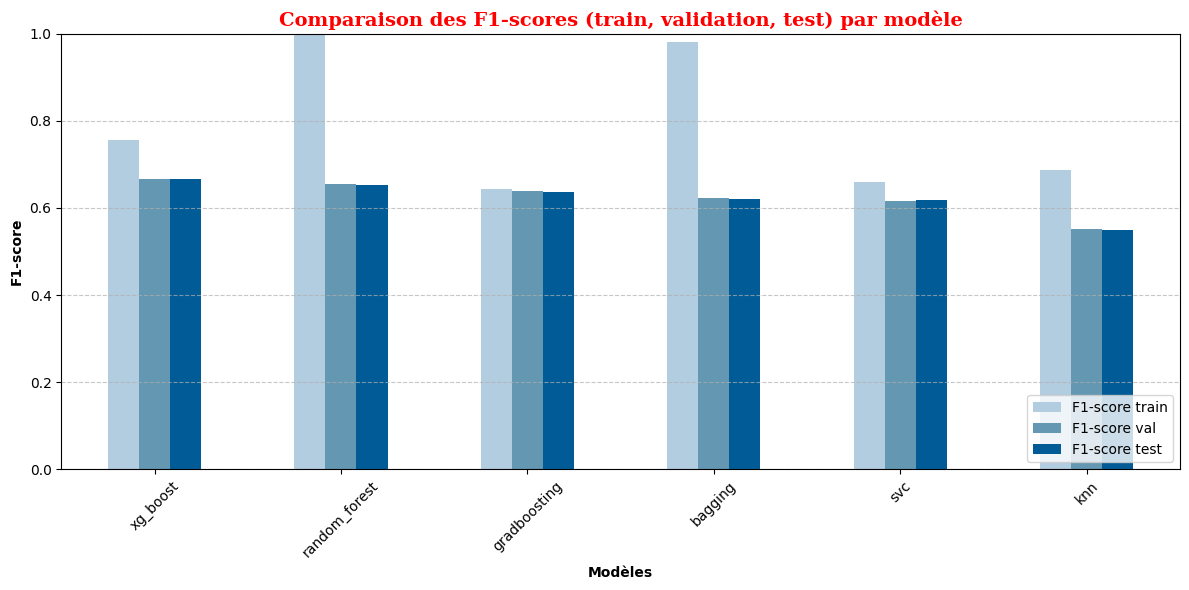

In [21]:
# Préparation des données pour la visualisation
f1_scores = pd.DataFrame({
    "F1-score train": {name: algo['f1_train'] for name, algo in algos_ml_classif.items()},
    "F1-score val": {name: algo['f1_val'] for name, algo in algos_ml_classif.items()},
    "F1-score test": {name: algo['f1_test'] for name, algo in algos_ml_classif.items()}
}).T

# Transposer pour barplot
f1_scores = f1_scores.T.sort_values("F1-score val", ascending=False)

# Affichage
# les couleurs
colors = ['#b3cde0', '#6497b1', '#005b96']
plt.figure(figsize=(12, 6))
f1_scores.plot(kind="bar", figsize=(12, 6), color = colors)
plt.title("Comparaison des F1-scores (train, validation, test) par modèle", fontdict=font_title)
plt.ylabel("F1-score", fontweight = "bold")
plt.xlabel("Modèles", fontweight = "bold")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [22]:
#pip install --upgrade xgboost scikit-learn
import xgboost
import sklearn

print(xgboost.__version__)
print(sklearn.__version__)

2.1.4
1.6.1


In [24]:
# Modèle de xgboostclassifier
xgboost_clf = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')

print(xgboost_clf.fit(X_train, y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


* Le modèle retenu est le XGBoostClassifier avec les meilleurs metrics, faisons la prédiction sur les données tests afin d'évaluer les métrics.

In [25]:
# Prédictions
y_pred = xgboost_clf.predict(X_test)

# Score sans labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     11010
           1       0.41      0.08      0.13       681
           2       0.51      0.42      0.46      3803
           3       0.66      0.66      0.66     10339

    accuracy                           0.68     25833
   macro avg       0.58      0.49      0.51     25833
weighted avg       0.66      0.68      0.67     25833



In [26]:
# Prédictions
y_pred = xgboost_clf.predict(X_test)

# Score avec labels
label_names = ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']
print(classification_report(y_test, y_pred, target_names = label_names))

                    precision    recall  f1-score   support

           Indemne       0.74      0.82      0.78     11010
               Tué       0.41      0.08      0.13       681
Blessé hospitalisé       0.51      0.42      0.46      3803
      Blessé léger       0.66      0.66      0.66     10339

          accuracy                           0.68     25833
         macro avg       0.58      0.49      0.51     25833
      weighted avg       0.66      0.68      0.67     25833



**Analyse sur les données test**

*Le modèle XGBoost a été évalué sur un ensemble de test comportant 25 833 observations réparties en 4 classes :*

* La classe **Indemne** est très bien prédite, avec un rappel élevé (82 %), ce qui signifie que la plupart des instances de cette classe sont correctement identifiées.

* La classe **Tué** est très mal prédite, avec un rappel de 7 % seulement. Cela indique que le modèle ne parvient presque pas à détecter cette classe.

Les classes **Blessé hospitalisé** et **Blessé léger** ont des performances modérées, avec des F1-scores respectifs de 0.46 et 0.66.

* Il semble exister un déséquilibre des classes, puisque la classe **Tué** est très minoritaire (681 observations).

**Moyennes globales :**

* Accuracy (exactitude) : 0.68, donc le modèle prédit correctement environ 68 % des cas.

* Macro avg (moyenne simple des scores par classe) :

    * Précision : 0.57, Rappel : 0.49, F1 : 0.50
    * Cette moyenne n’est pas pondérée par le support, elle est donc plus sensible aux performances sur les classes minoritaires.

* Weighted avg (moyenne pondérée) :

    * F1-score pondéré : 0.67, ce qui reflète mieux le poids réel des classes dans le jeu de données.

**Conclusion et recommandations :**
Modèle globalement correct, surtout sur les classes majoritaires.

* Aprés avoir fait la prédiction sur les données test puis évaluations des metrics, nous allons afficher les variables les plus importantes c'est à dire les variables qui ont plus participé pour l'obtention des meilleurs metrics.
* Ces variables indiquent qu’elles ont une contribution non négligeable dans la prédiction de la variable cible (grav – gravité des blessures).

In [27]:
# Selection de features importants
vars_imp1 = pd.Series(xgboost_clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_imp1

secu1     0.149822
catu      0.131657
obsm      0.113109
agg       0.107988
place     0.084601
catv      0.040015
sexe      0.039930
col       0.039101
motor     0.022593
catr      0.021613
situ      0.020517
vma       0.019721
circ      0.017647
manv      0.016200
dep       0.015433
lat       0.014010
choc      0.012953
nbv       0.012167
com       0.011642
age       0.011522
lum       0.009797
long      0.009434
heure     0.009356
surf      0.009011
int       0.008859
trajet    0.008188
plan      0.007962
senc      0.007294
atm       0.007180
prof      0.006962
mois      0.006931
jour      0.006786
dtype: float32

In [28]:
# Variables dont le score(seuil) d'importance est supérieur à 0.005
vars_selected1 = vars_imp1[vars_imp1 > 0.005].index.to_list()
vars_selected1

['secu1',
 'catu',
 'obsm',
 'agg',
 'place',
 'catv',
 'sexe',
 'col',
 'motor',
 'catr',
 'situ',
 'vma',
 'circ',
 'manv',
 'dep',
 'lat',
 'choc',
 'nbv',
 'com',
 'age',
 'lum',
 'long',
 'heure',
 'surf',
 'int',
 'trajet',
 'plan',
 'senc',
 'atm',
 'prof',
 'mois',
 'jour']

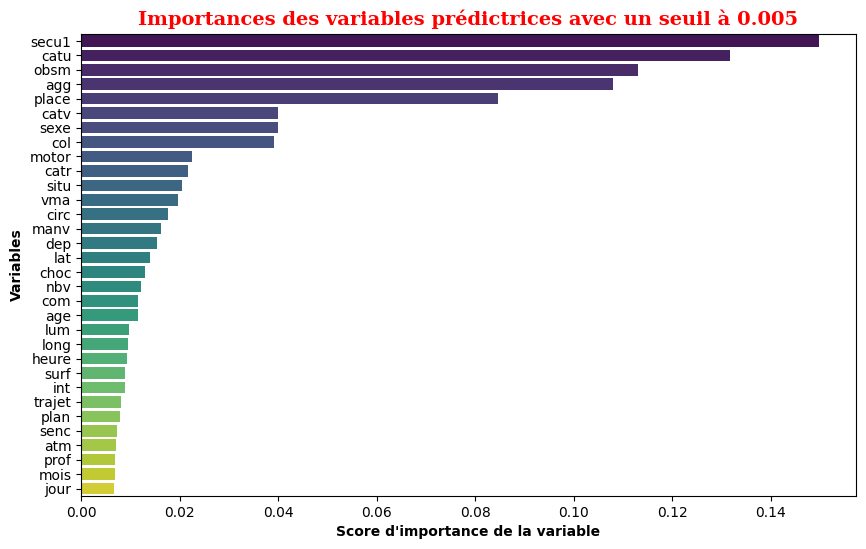

In [29]:
# Visualisation des variables importantes
plt.figure(figsize=(10,6))
sns.barplot(x = vars_imp1[vars_imp1 > 0.005], y = vars_selected1, palette="viridis")
plt.xlabel("Score d'importance de la variable", fontweight = "bold")
plt.ylabel("Variables", fontweight = "bold")
plt.title("Importances des variables prédictrices avec un seuil à 0.005", fontdict=font_title)
plt.show()

In [30]:
# Nombre de variables prédictrices avec seuil > 0.005
len(vars_selected1)

32

* Aprés affichage des meilleurs variables, nous voyons que la variable **secu1** en première position qui correspond le renseignement du caractère avec indication la présence et l’utilisation de l’équipement de sécurité en premier position ce qui est normale car en cas d'accidents ces équipements peuvent nous sauver d'une gravité extrême (modalité 2 : **Tué**  et modalité 3 : **Blessé hospitalisé**).
* Ensuite vienne d'autres variables comme **obsm (Manœuvre d’évitement réalisée ou non)**, **agg (	Zone urbaine / rurale)**, **catu (Catégorie de l’usager avec conducteur, passager, piéton…)**, **place (Position dans le véhicule)** qui contribuent fortement sur la gravité d'un accident.
* Certaines contribuent moins que d'autres pour celà nous allons fixer encore un seuil afin de choisir les variables qui contribuent pour une meilleure visualisation (ne pas négliger aucune des variables).

In [31]:
# Filtrer uniquement les variables avec une importance > 0.01
vars_imp1_filtered = vars_imp1[vars_imp1 > 0.01]
vars_imp1_filtered 

secu1    0.149822
catu     0.131657
obsm     0.113109
agg      0.107988
place    0.084601
catv     0.040015
sexe     0.039930
col      0.039101
motor    0.022593
catr     0.021613
situ     0.020517
vma      0.019721
circ     0.017647
manv     0.016200
dep      0.015433
lat      0.014010
choc     0.012953
nbv      0.012167
com      0.011642
age      0.011522
dtype: float32

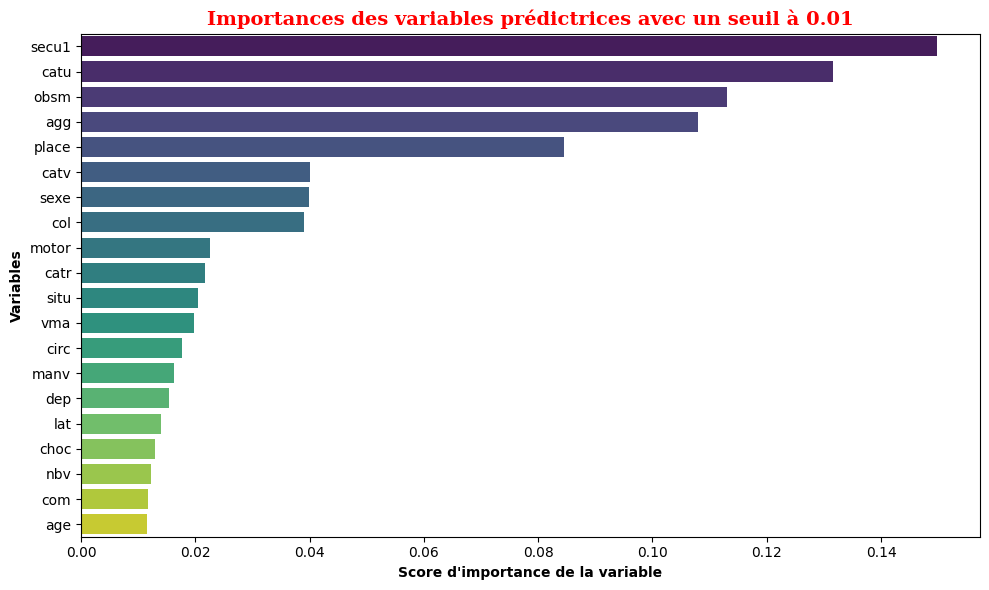

In [32]:
# Filtrer uniquement les variables avec une importance > 0.01
vars_imp1_filtered = vars_imp1[vars_imp1 > 0.01]

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x = vars_imp1_filtered.values, y = vars_imp1_filtered.index, palette="viridis")
plt.xlabel("Score d'importance de la variable", fontweight = "bold")
plt.ylabel("Variables", fontweight = "bold")
plt.title("Importances des variables prédictrices avec un seuil à 0.01", fontdict=font_title)
plt.tight_layout()
plt.show()

* Ces variables sont importantantes, cela oriente les politiques de prévention (ceinture, comportement d’évitement).
* Ou encore si heure ou jour impactent beaucoup, campagnes de sensibilisation ciblées.

In [33]:
# Nombre de variables prédictrices avec seuil > 0.01
len(vars_imp1_filtered)

20

In [34]:
# sous forme de liste avec un seuil à 0.01
vars_imp1_filtered = vars_imp1[vars_imp1 > 0.01].index.to_list()

### Modélisation avec les variables les plus imprtantes

* En ne conservant que les variables importantes, on peut simplifier le modèle (moins de bruit, meilleure généralisation).
* Cela aide à faire de la sélection de variables (feature selection).

In [35]:
# Modélisation avec les caractéristiques les plus importantes (seuil à 0.01)
xgboost_clf1 = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')

print(xgboost_clf1.fit(X_train[vars_imp1_filtered], y_train))
print("===============================================================================")
print(classification_report(y_test, xgboost_clf1.predict(X_test[vars_imp1_filtered]), target_names = label_names))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
                    precision    recall  f1-score   support

           Indemne       0.73      0.82      0.77     11010
               Tué       0.29      0.05      0.08       681
Blessé hospitalisé       0.51      0.42      0

* Y'a pas d'amélioration sur le score d'évaluation avec les variables les plus importantes, maintenant testons avec les hyperparamètres.

**Modèle avec hyperparamètres**

* Aprés avoir entrainer puis obtenir le **XGBoostClassifier** comme meilleur modèle avec les metrics d'évaluation sans hyperparamètre, 
* Nous allons maintenant réentrainer le modèle avec des hyperparamètres afin de comparer les deux modèles.

In [36]:
#pip install --upgrade xgboost

In [37]:
import time

# Démarrer le chronomètre
start_time = time.time()

# Instanciation du modèle de base
xgb_model = XGBClassifier(
    objective='multi:softmax',  # ou 'binary:logistic' selon ton cas
    eval_metric='mlogloss',     # ou 'logloss' pour binaire
    use_label_encoder=False,
    random_state=1234
)

# Définir la grille d’hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]  # pour la régularisation
}

# Instanciation de GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # change selon ton objectif (f1, roc_auc, etc.)
    n_jobs=-1,
    verbose=2
)

# Entraînement du modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Temps d'exécution
print("Temps d'execution de l'algorithme : {:.4} mn.".format((time.time() - start_time)/60))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Temps d'execution de l'algorithme : 36.31 mn.


In [38]:
# Afficher les meilleurs paramètres et la performance
print("Meilleurs paramètres :", grid_search.best_params_)
print("Score de validation croisée (accuracy) :", grid_search.best_score_)

Meilleurs paramètres : {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Score de validation croisée (accuracy) : 0.675368149037711


In [39]:
# Meilleur modèle
best_model = grid_search.best_estimator_

In [40]:
# modalités
label_names = ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']

In [41]:
# Évaluation sur les autres jeux de données
for name, X, y in [('train', X_train, y_train), ('val', X_val, y_val), ('test', X_test, y_test)]:
    y_pred = best_model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')  # ou 'macro' selon le besoin
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"\nPerformances sur {name} :")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("\nClassification report :")
    print(classification_report(y, y_pred, target_names = label_names))
    print("Matrice de confusion :")
    print(confusion_matrix(y, y_pred))
    print("========================================================")


Performances sur train :
Accuracy  : 0.7421
Precision : 0.7413
Recall    : 0.7421
F1-score  : 0.7358

Classification report :
                    precision    recall  f1-score   support

           Indemne       0.77      0.86      0.81     33183
               Tué       0.92      0.32      0.47      1939
Blessé hospitalisé       0.66      0.53      0.59     11452
      Blessé léger       0.73      0.72      0.72     30923

          accuracy                           0.74     77497
         macro avg       0.77      0.61      0.65     77497
      weighted avg       0.74      0.74      0.74     77497

Matrice de confusion :
[[28549    13   662  3959]
 [  218   613   622   486]
 [ 1446    27  6071  3908]
 [ 6838    12  1794 22279]]

Performances sur val :
Accuracy  : 0.6759
Precision : 0.6622
Recall    : 0.6759
F1-score  : 0.6647

Classification report :
                    precision    recall  f1-score   support

           Indemne       0.73      0.82      0.77     10950
            

**Performances du modèle AVEC hyperparamètres**

Apès réentrainement du modèle avec différentes hyperparamètres, nous obtenons un résultat pas satisfaisant (pas d'amélioration significative avec les hyperparamètres) avec une performance pas bonne sur les données val/test (performances test/val sont nettement moins bonnes que train) surapprentissage, ce pendant nous allons garder notre modèle sans tuning (modèle de base) comme meilleur modèle.

# 5. Enregistrement et déploiement du modéle

* Nous allons entrainer le meilleur modèle qui est sans hyperparamètre;
* Ensuite le sauvegarder afin de l'utiliser dans le futur pour faire de la prédiction avec de nouvelles données.

In [42]:
# Entraînement du modèle final
seed = 1234
Final_model = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')
print(Final_model.fit(X_train, y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


In [43]:
# Sauvegarde du modèle 
import pickle
pickle.dump(Final_model, open("xgboostclf_model.pkl", "wb"))

In [44]:
# Chargement du modèle pour faire de nouvelles prédictions
model_xgboostclf = pickle.load(open("xgboostclf_model.pkl", "rb"))

In [45]:
# Test prédiction sur de nouvelles données
y_pred_test = model_xgboostclf.predict(X_test)

In [46]:
# score
print(classification_report(y_test, y_pred_test, target_names = label_names))

                    precision    recall  f1-score   support

           Indemne       0.74      0.82      0.78     11010
               Tué       0.41      0.08      0.13       681
Blessé hospitalisé       0.51      0.42      0.46      3803
      Blessé léger       0.66      0.66      0.66     10339

          accuracy                           0.68     25833
         macro avg       0.58      0.49      0.51     25833
      weighted avg       0.66      0.68      0.67     25833



# 6. Interprétabilité des modules de machine learning

L'interprétation local des modèles consiste en un ensemble de techniques destinées à répondre à des questions telles que:
* Pourquoi le modèle a-t-il fait cette prédiction spécifique?
* Quel a été l'impact de cette valeur de caractéristiques spécifiques dans la prédiction.

### 6.1 LIME - Interprétation locale

**LIME (Local Interpretable Model-agnostic Explanations)**
* LIME est une technique qui permet de créer un modèle simple autour de la prédiction que nous voulons expliquer et utilise ce modèle simple pour donner une explication (parce que LIME n'apprend pas un modèle, il utilise un modèle déjà entraîné (model_xgboostclf) pour demander des prédictions, donc il n’a pas besoin de y_train).
* Lime peut être utilisé avec n'importe quel modèle de machine learning, pas seulement avec des arbres de décisions ou forêts aléatoires.
* LIME a besoin de connaître la probabilité d'appartenance à chaque classe pour estimer l'effet de chaque variable
* LIME affiche les informations : la partie gauche (graphique) contient des conditions logiques, tandis que la partie droite (tableau) affiche les valeurs exactes de l'observation.

In [47]:
#pip install lime
import lime
from lime import lime_tabular

label_names = {
    0: "Indemne",
    1: "Tué",
    2: "Blessé hospitalisé",
    3: "Blessé léger"
}
# Création de l'explainer LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names=list(label_names.values()),
    mode = "classification",
    random_state = 42)

In [48]:
# Exemple : interprétation pour la première observation du test
i = 0

# Prédiction avec probabilités
classe_predite = model_xgboostclf.predict_proba(X_test.iloc[[i]]).argmax()

# Affichage
print("Classe prédite par le modèle :", classe_predite)
print("Modalité prédite :", label_names[classe_predite])
print("Modalité réelle :", label_names[y_test.iloc[i]])

Classe prédite par le modèle : 3
Modalité prédite : Blessé léger
Modalité réelle : Blessé léger


In [49]:
# Exemple : interprétation pour la première observation du test
i = 0
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    model_xgboostclf.predict_proba,
    num_features = 10,
    #force LIME à expliquer la bonne classe
    labels=[classe_predite])

In [50]:
# Affichage dans le notebook
lime_exp.show_in_notebook()

**Interprétation de la prédiction LIME pour une observation**

* Observation testée : c’est la première ligne du jeu de test (i = 0)

* Classe prédite par le modèle : 3 correspond à "Blessé léger" (avec une probabilité de 0.76, soit 76%)
    * Classes possibles :
    * Indemne : 0.06
    * Tué : 0.01
    * Blessé hospitalisé : 0.17

* Variables ayant influencé la prédiction:
  
*LIME identifie les 10 variables les plus influentes pour cette prédiction et indique leur poids (positif ou négatif) sur la décision du modèle.*

* Facteurs ayant poussé vers "Blessé léger" (positifs) : Ce sont les barres rouge à droite dans LIME.
    * choc > 2.52	(Type de choc élevé)
    * agg <= -1.29	(localisation Agglomération)
    * catv > 1.55	(Catégorie de véhicule élevé)
    * secu1 = 0.02  (utilisation équipement)

* Facteurs ayant freiné la prédiction de "Blessé léger" (négatifs) : Ce sont les barres verts à gauche dans LIME.

    * obsm <= 0.02	  (Observance faible du mouvement)
    * motor <= -0.29  (Type de motorisation)
    * nbv <= -0.40	(Nombre de voies faible)
    * sexe <= -0.67		(Sexe)
    * catu <= -0.53   (Catégorie d’usager)

**Conclusion : Lecture de la barre de probabilités**

On peut résumer la réponse du modèle ainsi :

Il considère que l’observation a 76% de chance d’être un "Blessé léger".

Il hésite légèrement avec "Blessé hospitalisé" (17%) mais rejette totalement "Indemne" (6%) et "Tué" (1%).

In [51]:
# Exemple : interprétation pour la cinquième observation du test
i = 5

# Prédiction avec probabilités
classe_predite = model_xgboostclf.predict_proba(X_test.iloc[[i]]).argmax()

# Affichage
print("Classe prédite par le modèle :", classe_predite)
print("Modalité prédite :", label_names[classe_predite])
print("Modalité réelle :", label_names[y_test.iloc[i]])

Classe prédite par le modèle : 3
Modalité prédite : Blessé léger
Modalité réelle : Blessé hospitalisé


* Le modèle s’est trompé, car il a prédit l'individu 5 comme étant un "Blésser léger" alors qu'il était réellement un "Blessé hospitalisé".
* Affichons les variables qui ont poussé à cette prédiction
* Ensuite avec SHAP pour la contribution moyenne de chaque variable.

In [52]:
# Exemple : interprétation pour la première observation du test
i = 5
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    model_xgboostclf.predict_proba,
    num_features = 10,
    #force LIME à expliquer la bonne classe
    labels=[classe_predite])

In [53]:
# Affichage dans le notebook
lime_exp.show_in_notebook()

**Interprétation de la prédiction**

* Le modèle a prédit la classe “Blessé léger” avec une probabilité de 90%.

* Cette prédiction a été fortement influencée par :

    * sexe <= 	1.49	(Ce genre de valeur pour "sexe" favorise cette classe. Peut-être un certain sexe est + représenté dans les "blessés légers".)
      
    * situ = -0.49	situation de l'accident (probablement sur une piste cyclable.)

* Cette prédiction a été fortement diminuée par :

    * obsm ≤ 0.02 : très fort impact positif (+0.60)

    * secu1 ≤ -0.45 et motor ≤ -0.29 : contribuent modérément à la prédiction.

    * D'autres variables (agg, choc, nbv, vma…) ont eu un impact plus faible mais cohérent avec le résultat "Blessé léger".

**Analyse de l’erreur :**

Le modèle a fortement été influencé par sexe et situ pour donner une probabilité de 0.90 à "Blessé léger".

La vraie classe (Blessé hospitalisé) a une probabilité très faible (0.09) malgré la présence de facteurs de gravité (obsm, secu1, etc.).

Cela montre que certaines variables importantes médicalement (ex. secu1) sont sous-exploitées ou écrasées par d'autres plus fréquentes dans les données.

**Cela indique que cette personne ne présente pas de caractéristiques associées aux blessés hospitalisés ou tués dans les données d’entraînement.**

### 6.2 SHAP — Interprétation locale et globale

* Il calcule la contribution moyenne de chaque caractéristique à la prédiction sur toutes les combinaisons possibles de caractéristiques.

In [54]:
#pip install shap
import shap

# Création de l'explainer spécifique pour modèles d'arbre (XGBoost)
shap_explainer = shap.TreeExplainer(model_xgboostclf)

In [55]:
# Calcul des valeurs SHAP sur les données test
shap_values = shap_explainer(X_test)

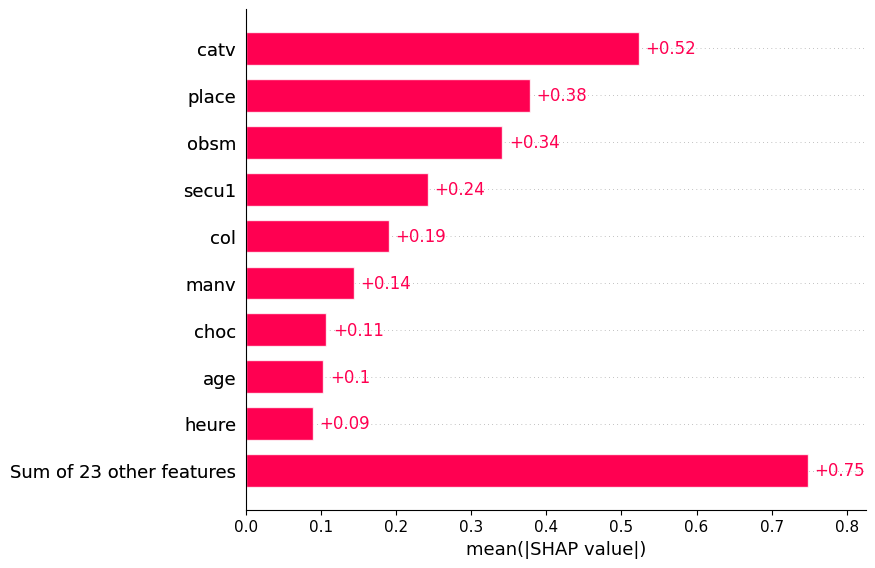

In [56]:
# Vue globale : importance moyenne des variables pour une classe spécifique (par exemple classe 0 - Indemne)
shap.plots.bar(shap_values[:, :, 0])

**Interprétation de la prédiction**

* Cela montre l'importance moyenne des variables pour expliquer les prédictions vers la classe "Indemne".

* catv est la variable la plus influente en moyenne pour prédire "Indemne" (SHAP moyen ≈ 0.51)

* Puis viennent place, obsm, secu1, col, etc.

* Plus la valeur moyenne de SHAP est élevée, plus la variable contribue en général aux prédictions vers la classe 0 (indemne).

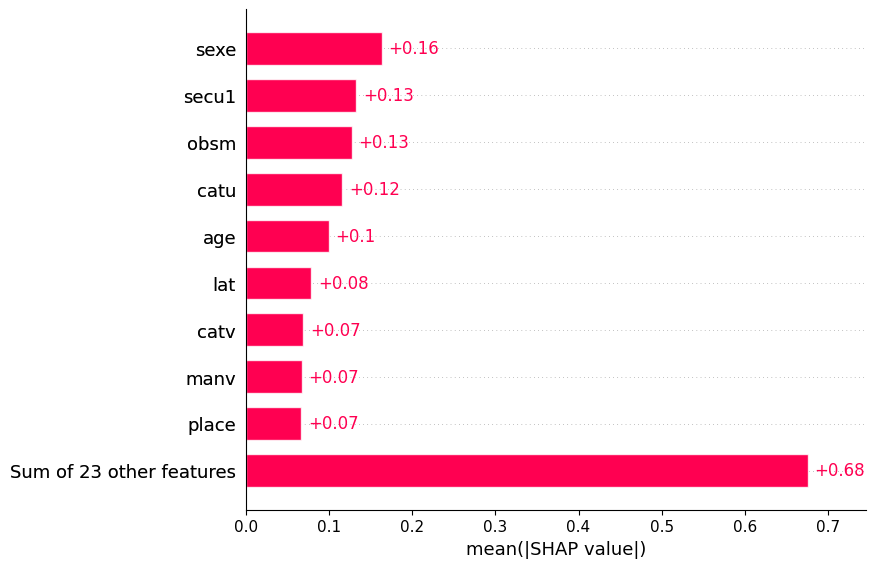

In [57]:
# Vue globale : importance moyenne des variables pour une classe (classe 3 - Blessé léger)
shap.plots.bar(shap_values[:, :, 3])

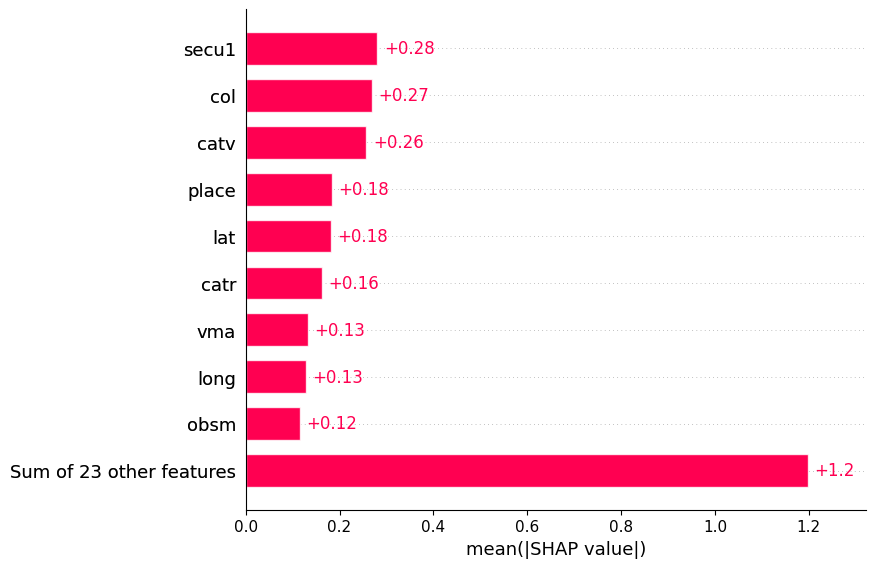

In [58]:
# Vue globale : importance moyenne des variables pour une classe (classe 2 - Blessé hospitalisé)
shap.plots.bar(shap_values[:, :, 2])

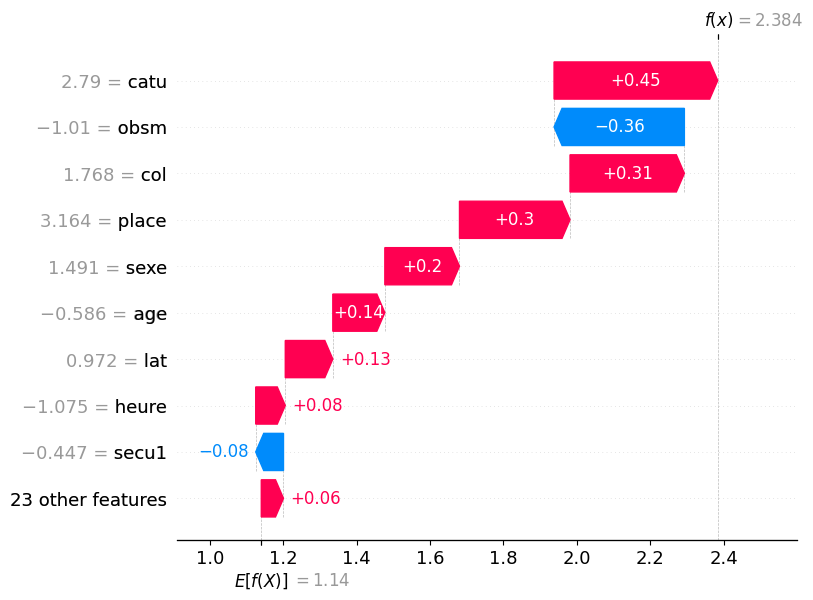

In [59]:
# Pour afficher l'explication de l'observation 5 pour la classe 3 (modalité prédite)
# 3 = classe "blessé léger", shap_values[observation, feature, classe]
shap.plots.waterfall(shap_values[5, :, 3])

**Interprétation de la prédiction**

Ceci montre quels attributs ont poussé la prédiction de l'individu n°5 vers la classe "Blseeé léger".

* Valeur de base (E[f(X)]) ≈ 1.14
* Valeur finale f(x) ≈ 2.384 (Ce score est beaucoup plus élevé ce qui donne la Classe prédite)
* La somme des SHAP values + la valeur de base donne f(x) = 3.524 (logits). Soit une probabilité très élevé pour la classe "Blessé léger"

* Les variables les plus influentes positivement :

    * place, col, catu, sexe

* Les variables les plus influentes négativement :

    * obsm, secu1

**Conclusion :**

Les variables **place** et **col** jouent un rôle clé dans cette mauvaise classification. Elles poussent très fortement vers la classe Blessé léger, alors que la classe réelle était Blessé hospitalisé.

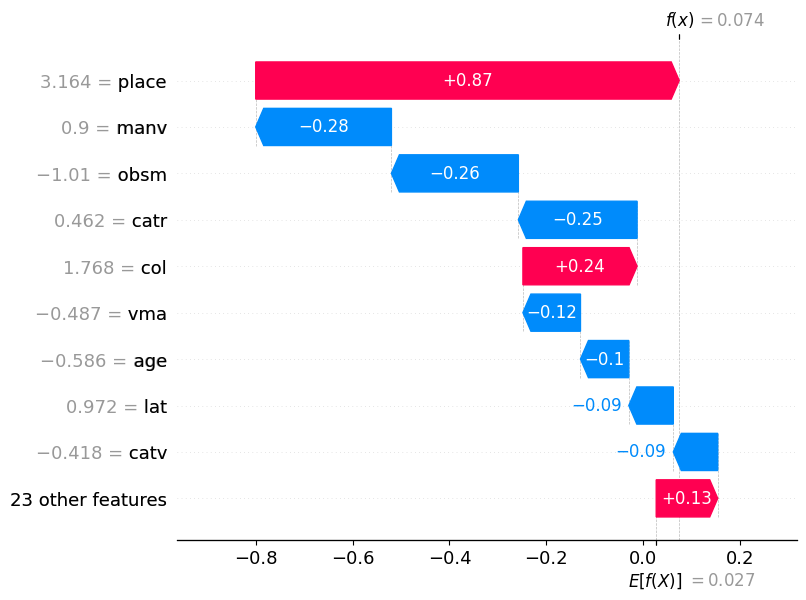

In [60]:
# Pour afficher l'explication de l'observation 5 pour la classe 2 (modalité réelle)
# 2 = classe "Blessé hospitalisé", shap_values[observation, feature, classe]
shap.plots.waterfall(shap_values[5, :, 2])

**Interprétation de la prédiction**

* La contribution de chaque variable pour l’individu 5 à prédire la classe Blessé hospitalisé.

* Valeur de base (E[f(X)]) ≈ 0.027

* Valeur finale f(x) ≈ 0.074 (Donc peu de soutien pour cette classe, comparée à d'autres classes probablement plus soutenues.)

* Les variables principales qui abaissent la probabilité de cette classe :

    * obsm (obstacle mobile), catr (catégorie de route), age, manv, agg, vma, etc.

    * Celles qui augmentent un peu la probabilité :

    * place, col, et autres

**Conclusion :**

Le score pour Blessé hospitalisé est trop faible, donc ce n’est pas la classe sélectionnée.

**Maintenant nous avons tester la classification multiclasse, nous allons la classification binaire afin de comparer les résultats.**

# 7. Modélisation BINAIRE

In [87]:
# prendre la copie des variables explicatives
X_bin = X_bin

# faire une copie de la variable cible d'origine
y_bin = y_bin

In [88]:
# Remplacement des classes
# 1 (Indemne) et 4 (Blessé léger) → 0 (Non grave)
# 2 (Tué) et 3 (Blessé hospitalisé) → 1 (Grave)
y_bin = np.where((y_bin == 1) | (y_bin == 4), 0, 1)

In [89]:
# Vérification de VM
pd.Series(y_bin).isna().sum()

0

In [90]:
# Vérification de la nouvelle distribution
print(pd.Series(y_bin).value_counts())

0    106849
1     22314
Name: count, dtype: int64


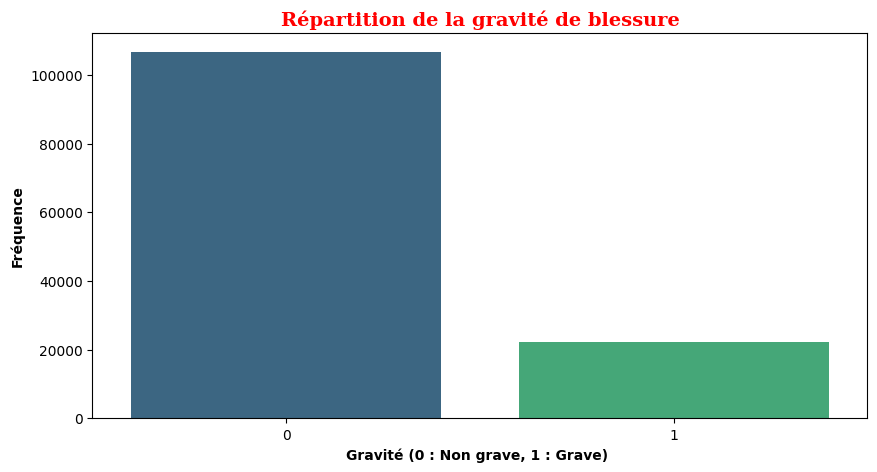

In [91]:
# Visualisation
plt.figure(figsize=(10,5)) 
sns.countplot(x = df["grave_binaire"], order = df["grave_binaire"].value_counts(ascending=False).index, data = df, palette ="viridis")
plt.xlabel("Gravité (0 : Non grave, 1 : Grave) ", fontweight = "bold")
plt.ylabel("Fréquence", fontweight = "bold")
plt.title("Répartition de la gravité de blessure", fontdict=font_title)
plt.show()

### Séparartion des données

In [92]:
X_bin.shape

(129163, 32)

In [93]:
# Séparation initiale : 80% entraînement + validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_bin, y_bin, test_size = 0.2, random_state=42)

# Séparation secondaire
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=42)

# Vérification des dimensions
print("Taille de X_train :", X_train.shape)
print("Taille de X_val   :", X_val.shape)
print("Taille de X_test  :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_val   :", y_val.shape)
print("Taille de y_test  :", y_test.shape)

Taille de X_train : (77497, 32)
Taille de X_val   : (25833, 32)
Taille de X_test  : (25833, 32)
Taille de y_train : (77497,)
Taille de y_val   : (25833,)
Taille de y_test  : (25833,)


### Normalisation des données

In [94]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### Entrainement des modèles

In [95]:
# Essai de plusieurs algorithmes de machine learning
seed = 1234
algos_ml_classif = {
    "random_forest": {"model": RandomForestClassifier(random_state=seed)},
    "bagging": {"model": BaggingClassifier(random_state=seed)},
    "gradboosting": {"model": GradientBoostingClassifier(random_state=seed)},
    "xg_boost": {"model": XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')},
    "svc": {"model": SVC(probability=True)},
    "knn": {"model": KNeighborsClassifier()}
}

In [96]:
import time
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_auc_score
)

start_time = time.time()

# Boucle sur les modèles
for name, algo in algos_ml_classif.items():
    print(f"Entraînement du modèle : {name}")
    
    model = algo['model'].fit(X_train, y_train)

    # Prédictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Métriques classiques
    algo['accuracy_train'] = accuracy_score(y_train, y_train_pred)
    algo['f1_train'] = f1_score(y_train, y_train_pred, average='weighted')
    algo['report_train'] = classification_report(y_train, y_train_pred, output_dict=True)
    algo['conf_matrix_train'] = confusion_matrix(y_train, y_train_pred)

    algo['accuracy_val'] = accuracy_score(y_val, y_val_pred)
    algo['f1_val'] = f1_score(y_val, y_val_pred, average='weighted')
    algo['report_val'] = classification_report(y_val, y_val_pred, output_dict=True)
    algo['conf_matrix_val'] = confusion_matrix(y_val, y_val_pred)

    algo['accuracy_test'] = accuracy_score(y_test, y_test_pred)
    algo['f1_test'] = f1_score(y_test, y_test_pred, average='weighted')
    algo['report_test'] = classification_report(y_test, y_test_pred, output_dict=True)
    algo['conf_matrix_test'] = confusion_matrix(y_test, y_test_pred)

    # AUC si proba dispo
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_val_proba = model.predict_proba(X_val)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

        algo['auc_train'] = roc_auc_score(y_train, y_train_proba)
        algo['auc_val'] = roc_auc_score(y_val, y_val_proba)
        algo['auc_test'] = roc_auc_score(y_test, y_test_proba)
    else:
        algo['auc_train'] = algo['auc_val'] = algo['auc_test'] = None

# Affichage du temps d'exécution
print("Temps d'exécution de tous les modèles : {:.2f} minutes.".format((time.time() - start_time) / 60))

Entraînement du modèle : random_forest
Entraînement du modèle : bagging
Entraînement du modèle : gradboosting
Entraînement du modèle : xg_boost
Entraînement du modèle : svc
Entraînement du modèle : knn
Temps d'exécution de tous les modèles : 77.90 minutes.


In [97]:
# Afficher le résultat des tests algorithmiques
algos_ml_classif

{'random_forest': {'model': RandomForestClassifier(random_state=1234),
  'accuracy_train': 0.999922577648167,
  'f1_train': 0.999922577648167,
  'report_train': {'0': {'precision': 0.9999532025083455,
    'recall': 0.9999532025083455,
    'f1-score': 0.9999532025083455,
    'support': 64106.0},
   '1': {'precision': 0.9997759689343589,
    'recall': 0.9997759689343589,
    'f1-score': 0.9997759689343589,
    'support': 13391.0},
   'accuracy': 0.999922577648167,
   'macro avg': {'precision': 0.9998645857213522,
    'recall': 0.9998645857213522,
    'f1-score': 0.9998645857213522,
    'support': 77497.0},
   'weighted avg': {'precision': 0.999922577648167,
    'recall': 0.999922577648167,
    'f1-score': 0.999922577648167,
    'support': 77497.0}},
  'conf_matrix_train': array([[64103,     3],
         [    3, 13388]], dtype=int64),
  'accuracy_val': 0.8575852591646344,
  'f1_val': 0.8403775406576435,
  'report_val': {'0': {'precision': 0.8790602131210682,
    'recall': 0.96012900813312

### Evaluation des modèles avec les metrics

In [98]:
# Résumé des performances
results_metrics = pd.DataFrame({
    name: {
        "Accuracy train": algo['accuracy_train'],
        "F1-score train": algo['f1_train'],
        "AUC train": algo['auc_train'],
        "Accuracy val": algo['accuracy_val'],
        "F1-score val": algo['f1_val'],
        "AUC val": algo['auc_val'],
        "Accuracy test": algo['accuracy_test'],
        "F1-score test": algo['f1_test'],
        "AUC test": algo['auc_test']
    } for name, algo in algos_ml_classif.items()
}).T

# Affichage des classements selon F1 et AUC
print("\n Classement par F1-score test :")
display(results_metrics.sort_values("F1-score test", ascending=False))

print("\n Classement par AUC-ROC test :")
display(results_metrics.sort_values("AUC test", ascending=False))


 Classement par F1-score test :


Accuracy train  F1-score train  AUC train  Accuracy val  \
xg_boost             0.902241        0.895345   0.936005      0.860450   
random_forest        0.999923        0.999923   1.000000      0.857585   
bagging              0.986941        0.986765   0.999383      0.846437   
gradboosting         0.854614        0.831425   0.865051      0.853017   
svc                  0.860459        0.831968   0.900951      0.847521   
knn                  0.873905        0.858222   0.913383      0.833895   

               F1-score val   AUC val  Accuracy test  F1-score test  AUC test  
xg_boost           0.849511  0.872724       0.860256       0.849643  0.876321  
random_forest      0.840378  0.866641       0.857237       0.840795  0.870107  
bagging            0.830896  0.826738       0.846592       0.831187  0.829653  
gradboosting       0.829707  0.855946       0.852785       0.830339  0.862049  
svc                0.814516  0.821219       0.845972       0.812934  0.824615  
knn                0.812005  0.747313       0.831262       0.808133  0.747946


 Classement par AUC-ROC test :


Accuracy train  F1-score train  AUC train  Accuracy val  \
xg_boost             0.902241        0.895345   0.936005      0.860450   
random_forest        0.999923        0.999923   1.000000      0.857585   
gradboosting         0.854614        0.831425   0.865051      0.853017   
bagging              0.986941        0.986765   0.999383      0.846437   
svc                  0.860459        0.831968   0.900951      0.847521   
knn                  0.873905        0.858222   0.913383      0.833895   

               F1-score val   AUC val  Accuracy test  F1-score test  AUC test  
xg_boost           0.849511  0.872724       0.860256       0.849643  0.876321  
random_forest      0.840378  0.866641       0.857237       0.840795  0.870107  
gradboosting       0.829707  0.855946       0.852785       0.830339  0.862049  
bagging            0.830896  0.826738       0.846592       0.831187  0.829653  
svc                0.814516  0.821219       0.845972       0.812934  0.824615  
knn                0.812005  0.747313       0.831262       0.808133  0.747946

**Analyse détaillée des performances des modèles avec classification binaire**

Pour évaluer la qualité des différents modèles, plusieurs métriques ont été utilisées :
* Accuracy : proportion de bonnes prédictions.
* F1-score (pondéré) : moyenne harmonique entre la précision et le rappel, utile en cas de classes déséquilibrées.
* AUC-ROC : capacité du modèle à discriminer les classes ; plus elle est proche de 1, meilleur est le modèle.
* Comparaison train vs validation/test permet de détecter un surapprentissage (overfitting) ou un sous-apprentissage (underfitting).

**Interprétation des modèles**

**XGBoost**
Le modèle XGBoost affiche les meilleurs résultats globaux. Son F1-score est stable sur les trois jeux de données (train : 0.895, val : 0.849, test : 0.849), tout comme son AUC (train : 0.936, test : 0.876).
Cela traduit une excellente capacité de généralisation. C’est le modèle le plus équilibré et le plus performant dans ce contexte, sans signe évident de surapprentissage.

**Random Forest**
Le modèle Random Forest obtient des résultats très élevés en entraînement (F1-score : 0.999), mais moins bons en validation et test (F1-score test : 0.838).
Cette chute de performance entre le train et le test, combinée à un AUC de 0.870 (1.00 en train), indique un surapprentissage important. Il reste néanmoins performant, mais moins robuste que XGBoost.

**Bagging**
Le modèle Bagging présente lui aussi un F1-score presque parfait en train (0.987), mais diminue en test (0.831), avec un AUC de 0.829.
Cela confirme un effet d’overfitting, bien qu’un peu moins prononcé que pour Random Forest. Il reste un bon modèle, mais moins stable que XGBoost ou Gradient Boosting.

**Gradient Boosting**
Le modèle Gradient Boosting généralise correctement, avec des scores proches entre train (F1 : 0.831) et test (F1 : 0.829).
L’AUC test est également satisfaisant (0.861). Il est moins performant que XGBoost, mais plus robuste que Bagging et Random Forest.
Un bon modèle secondaire, fiable et stable.

**SVC**
Le modèle SVC montre une bonne stabilité, mais avec des performances plus modestes (F1-score test : 0.813, AUC : 0.824).
Il n’overfit pas, mais est moins performant que les modèles d’ensemble. C’est un modèle acceptable, mais pas le plus adapté ici.

**KNN**
Le modèle KNN obtient des résultats corrects en train (F1 : 0.859) mais inférieurs en test (F1 : 0.809, AUC : 0.745).
Il montre un léger surapprentissage et une faible capacité de discrimination. Il est donc peu recommandé dans ce contexte, sauf à améliorer le prétraitement (mise à l’échelle, réduction de dimension, etc.).

**Conclusion**
Parmi tous les modèles testés, le XGBoostClassifier se démarque clairement.
Il combine très bonnes performances, grande stabilité entre les jeux de données, et aucun signe de surapprentissage.
C’est donc le modèle le plus fiable et le meilleur choix pour cette classification binaire, avec les hyperparamètres actuels.

### Visualisation des metrics

<Figure size 1200x600 with 0 Axes>

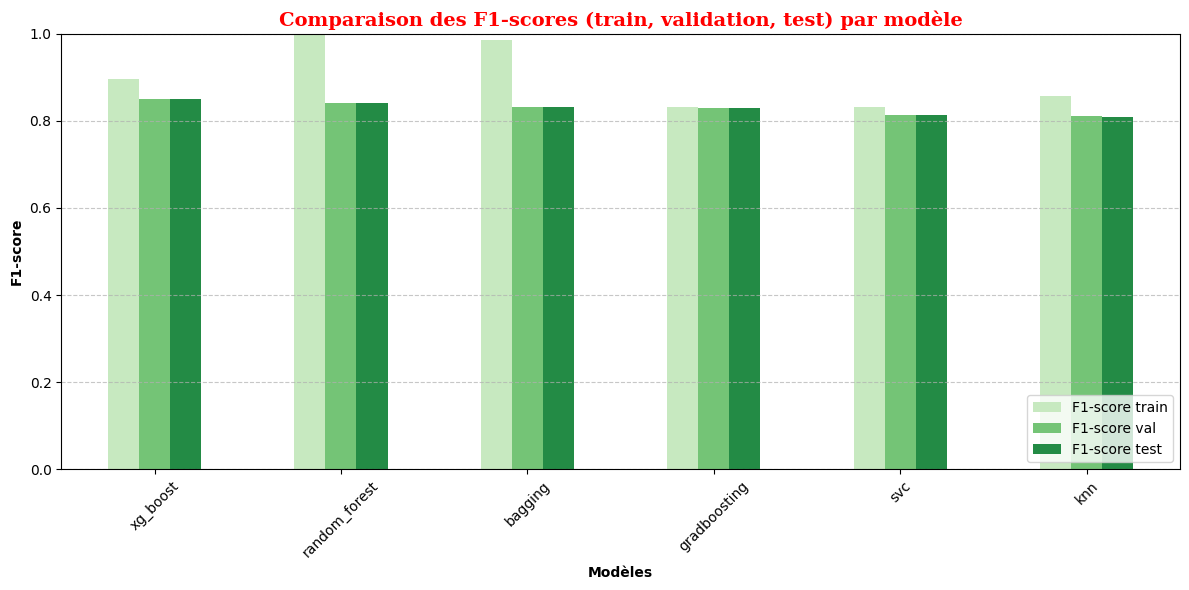

In [99]:
# Préparation des données pour la visualisation
f1_scores = pd.DataFrame({
    "F1-score train": {name: algo['f1_train'] for name, algo in algos_ml_classif.items()},
    "F1-score val": {name: algo['f1_val'] for name, algo in algos_ml_classif.items()},
    "F1-score test": {name: algo['f1_test'] for name, algo in algos_ml_classif.items()}
}).T

# Transposer pour barplot
f1_scores = f1_scores.T.sort_values("F1-score val", ascending=False)

# Affichage
# les couleurs
colors = ['#c7e9c0', '#74c476', '#238b45']
plt.figure(figsize=(12, 6))
f1_scores.plot(kind="bar", figsize=(12, 6), color = colors)
plt.title("Comparaison des F1-scores (train, validation, test) par modèle", fontdict=font_title)
plt.ylabel("F1-score", fontweight = "bold")
plt.xlabel("Modèles", fontweight = "bold")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

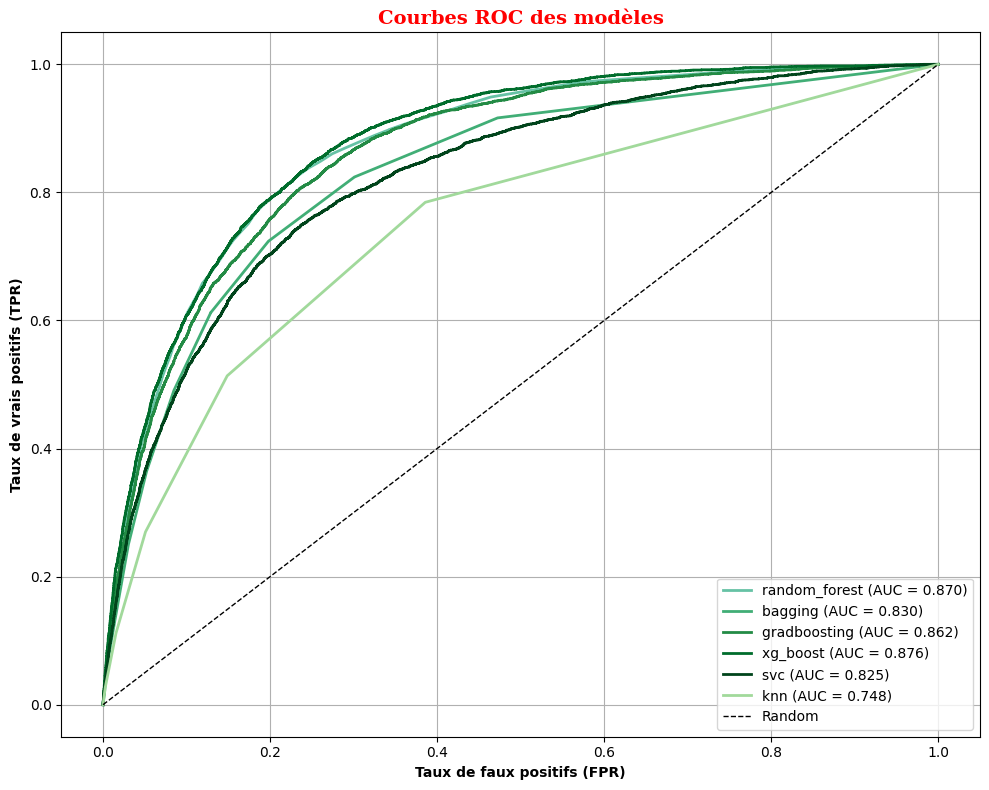

In [102]:
# visualisation
plt.figure(figsize=(10, 8))

# Palette verte personnalisée (à adapter si besoin)
colors = ['#66c2a5', '#41ae76', '#238b45', '#006d2c', '#00441b', '#a1d99b', '#74c476']
color_idx = 0

# Tracer la courbe ROC de chaque modèle
for name, algo in algos_ml_classif.items():
    model = algo['model']
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", color=colors[color_idx % len(colors)], linewidth=2)
    color_idx += 1

# Ligne diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label="Random", linewidth=1)

# Mise en forme
plt.xlabel("Taux de faux positifs (FPR)", fontweight = "bold")
plt.ylabel("Taux de vrais positifs (TPR)", fontweight = "bold")
plt.title("Courbes ROC des modèles", fontdict=font_title)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

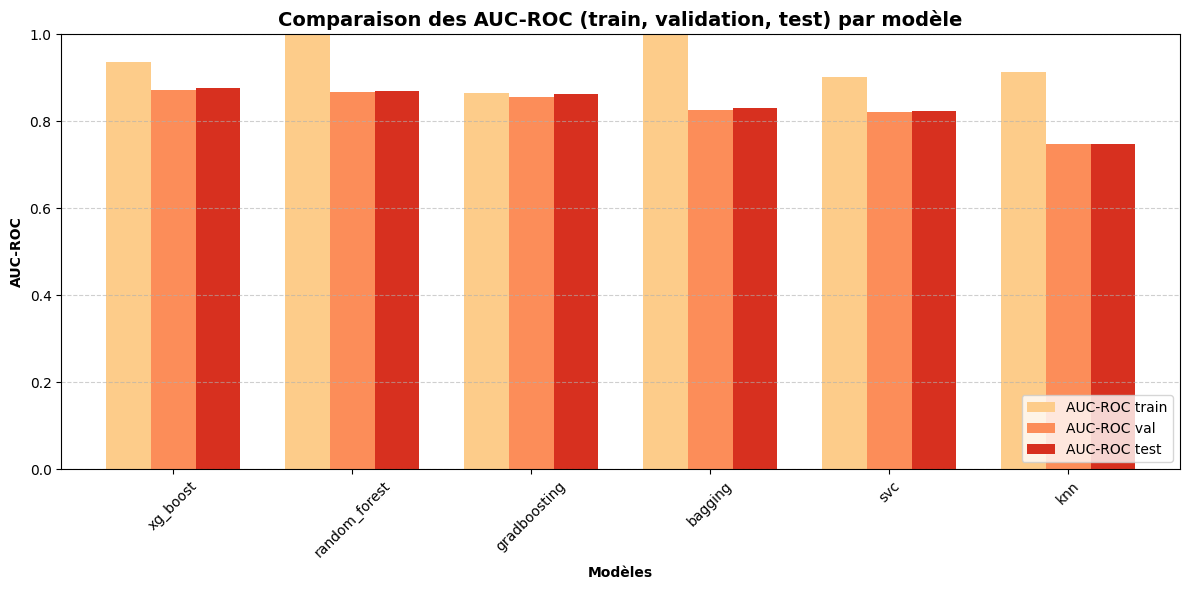

In [103]:
# Préparation des données AUC-ROC
roc_scores = pd.DataFrame({
    "AUC-ROC train": {name: algo['auc_train'] for name, algo in algos_ml_classif.items()},
    "AUC-ROC val": {name: algo['auc_val'] for name, algo in algos_ml_classif.items()},
    "AUC-ROC test": {name: algo['auc_test'] for name, algo in algos_ml_classif.items()}
}).T

# Transposer pour avoir les modèles en index
roc_scores = roc_scores.T.sort_values("AUC-ROC val", ascending=False)

#  Palette orange personnalisée
colors = ['#fdcc8a', '#fc8d59', '#d7301f']  # clair -> foncé

# Options de style pour les titres
font_title = {'fontsize': 14, 'fontweight': 'bold'}

# Création du graphique
plt.figure(figsize=(12, 6))
roc_scores.plot(kind="bar", figsize=(12, 6), color=colors, width=0.75)
plt.title("Comparaison des AUC-ROC (train, validation, test) par modèle", fontdict=font_title)
plt.ylabel("AUC-ROC", fontweight="bold")
plt.xlabel("Modèles", fontweight="bold")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Meilleur modèle et prédiction

In [104]:
# Modèle de xgboostclassifier
xgboost_clfb = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')

print(xgboost_clfb.fit(X_train, y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1234, ...)


In [105]:
# Prédictions
y_pred = xgboost_clfb.predict(X_test)

# Score sans labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     21349
           1       0.64      0.44      0.52      4484

    accuracy                           0.86     25833
   macro avg       0.77      0.70      0.72     25833
weighted avg       0.85      0.86      0.85     25833



In [106]:
# Prédictions
y_pred = xgboost_clfb.predict(X_test)

# Score avec labels
label_names = ['Non grave', 'Grave']
print(classification_report(y_test, y_pred, target_names = label_names))

              precision    recall  f1-score   support

   Non grave       0.89      0.95      0.92     21349
       Grave       0.64      0.44      0.52      4484

    accuracy                           0.86     25833
   macro avg       0.77      0.70      0.72     25833
weighted avg       0.85      0.86      0.85     25833



**Analyse sur les données test**

*Le modèle XGBoost a été évalué sur un ensemble de test comportant 25 833 observations réparties en 2 classes :*

* **Non grave :**  21 348 observations (83 %)

* **Grave :** 4 485 observations (17 %)

**Performances par classe :**

* La classe Non grave est très bien prédite, avec :

    * une précision élevée (0.89),

    * un rappel excellent (0.95),

    * un F1-score élevé (0.92).

*Cela signifie que le modèle identifie très bien les cas non graves, avec peu de faux positifs ou de faux négatifs.*

* La classe Grave, en revanche, est nettement moins bien prédite :

    * Précision : 0.64 (sur 100 cas prédits comme « grave », 64 sont réellement graves),

    * Rappel : 0.44 (le modèle ne détecte que 44 % des cas graves),

    * F1-score : 0.52.

*Cela indique que plus de la moitié des cas graves sont mal classés comme non graves.*

**Moyennes globales :**

* Accuracy (Exactitude) : 0.86, le modèle effectue 86 % de bonnes prédictions globalement, ce qui est élevé.

* Macro average (moyenne simple) :

* Précision : 0.77, Rappel : 0.69, F1-score : 0.72
* Cette moyenne prend en compte les deux classes de façon égale, ce qui montre que le modèle déséquilibre ses performances en faveur de la classe majoritaire.

* Weighted average (pondérée par la fréquence des classes) :

    * F1-score pondéré : 0.85
    * Cette moyenne reflète la bonne performance sur la classe majoritaire, masquant partiellement les faiblesses sur la classe minoritaire.

**Conclusion et recommandations :**
Le modèle est très performant pour identifier les accidents non graves, mais il éprouve des difficultés à détecter les cas graves, qui sont pourtant ceux qui pourraient présenter le plus d’enjeux dans un contexte réel.

### Variables importantes

In [107]:
# Selection de features importants
vars_imp1 = pd.Series(xgboost_clfb.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_imp1

agg       0.164481
secu1     0.096873
col       0.067981
place     0.066806
catr      0.059402
obsm      0.057632
situ      0.052692
catv      0.046195
vma       0.037227
circ      0.036247
lat       0.026868
dep       0.024737
nbv       0.023391
com       0.020863
catu      0.020193
age       0.016977
choc      0.016037
lum       0.015590
manv      0.014475
long      0.014409
heure     0.012466
sexe      0.011345
trajet    0.010766
plan      0.010712
motor     0.010669
surf      0.010093
int       0.009955
senc      0.009532
atm       0.009183
jour      0.009146
prof      0.008986
mois      0.008072
dtype: float32

In [108]:
# Variables dont le score(seuil) d'importance est supérieur à 0.005
vars_selected1 = vars_imp1[vars_imp1 > 0.005].index.to_list()
vars_selected1

['agg',
 'secu1',
 'col',
 'place',
 'catr',
 'obsm',
 'situ',
 'catv',
 'vma',
 'circ',
 'lat',
 'dep',
 'nbv',
 'com',
 'catu',
 'age',
 'choc',
 'lum',
 'manv',
 'long',
 'heure',
 'sexe',
 'trajet',
 'plan',
 'motor',
 'surf',
 'int',
 'senc',
 'atm',
 'jour',
 'prof',
 'mois']

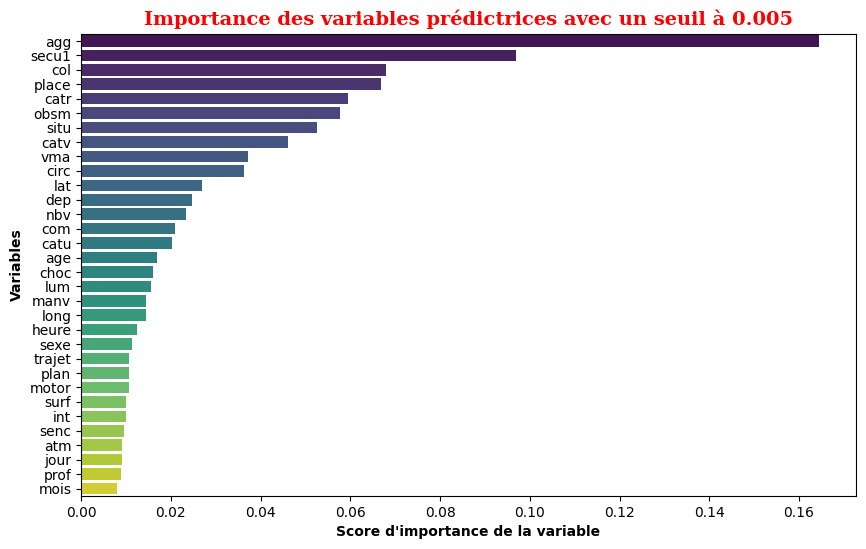

In [132]:
# Visualisation
font_title = {"family": "serif",
              "color":  "red",
              "weight": "bold",
              "size": 14}

# Visualisation des variables importantes
plt.figure(figsize=(10,6))
sns.barplot(x = vars_imp1[vars_imp1 > 0.005], y = vars_selected1, palette="viridis")
plt.xlabel("Score d'importance de la variable", fontweight = "bold")
plt.ylabel("Variables", fontweight = "bold")
plt.title("Importance des variables prédictrices avec un seuil à 0.005", fontdict=font_title)
plt.show()

**Interprétation avec les variables les plus importantes**

* Les variables les plus influentes montrent que :
    * Le lieu de l’accident (agg, catr, lat/long, dep),
    * Le comportement des usagers (secu1, situ, obsm, manv),
    * Et les conditions routières (vma, circ, lum, atm) ont un impact significatif sur la gravité d’un accident.

*Cela valide les connaissances métiers classiques, et permet de cibler des axes d’intervention en prévention routière : zones à risque, types de véhicules vulnérables, ou comportements dangereux.*

**Modélisation avec les variables les plus importantes**

* En ne conservant que les variables importantes, on peut simplifier le modèle (moins de bruit, meilleure généralisation).
* Cela aide à faire de la sélection de variables (feature selection).

In [111]:
# Modélisation avec les caractéristiques les plus importantes (seuil à 0.01)
xgboost_clf2 = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')

print(xgboost_clf2.fit(X_train[vars_selected1], y_train))
print("===============================================================================")
print(classification_report(y_test, xgboost_clf2.predict(X_test[vars_selected1]), target_names = label_names))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1234, ...)
              precision    recall  f1-score   support

   Non grave       0.89      0.95      0.92     21349
       Grave       0.64      0.44      0.52      4484

    accuracy                           0.86     25833
   macro avg      

* Il n'y a pas d'amélioration en faisant de la modélisation avec les caractéristiques les plus importantes.

**Modèle avec hyperparamètres**

* Aprés avoir entrainer puis obtenir le **XGBoostClassifier** comme meilleur modèle pour une classification binaire avec les metrics d'évaluation sans hyperparamètre, 
* Nous allons maintenant réentrainer le modèle avec des hyperparamètres afin de comparer les deux modèles.

### Modélisation avec hyperparamètres

In [112]:
# Définir le modèle (sans paramètre num_class)
xgb_modelb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grille d'hyperparamètres typiques pour classification binaire
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_modelb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Entraînement
start_time = time.time()
grid_search.fit(X_train, y_train)
print("Temps d'execution : {:.2f} mn".format((time.time() - start_time)/60))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Temps d'execution : 3.45 mn


In [113]:
# Meilleurs paramètres et score
print("Best params :", grid_search.best_params_)
print("Best AUC :", grid_search.best_score_)

Best params : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best AUC : 0.876354291498482


In [114]:
# Meilleur modèle
best_modelb = grid_search.best_estimator_
best_modelb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Evaluation du modèle avec hyperparamètres

In [115]:
# Score avec labels
label_names = ['Non grave', 'Grave']


 Performances sur train :
Accuracy  : 0.9108
Precision : 0.9069
Recall    : 0.9108
F1-score  : 0.9044
ROC AUC   : 0.9463

 Classification report :
              precision    recall  f1-score   support

   Non grave       0.92      0.98      0.95     64106
       Grave       0.84      0.59      0.70     13391

    accuracy                           0.91     77497
   macro avg       0.88      0.79      0.82     77497
weighted avg       0.91      0.91      0.90     77497

 Matrice de confusion :
[[62623  1483]
 [ 5430  7961]]

 Performances sur val :
Accuracy  : 0.8635
Precision : 0.8496
Recall    : 0.8635
F1-score  : 0.8515
ROC AUC   : 0.8781

 Classification report :
              precision    recall  f1-score   support

   Non grave       0.89      0.95      0.92     21394
       Grave       0.66      0.43      0.52      4439

    accuracy                           0.86     25833
   macro avg       0.77      0.69      0.72     25833
weighted avg       0.85      0.86      0.85     2583

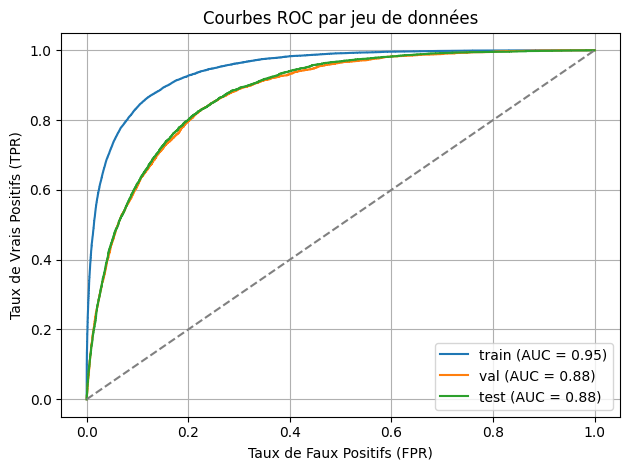

In [116]:
# Évaluation + ROC
for name, X, y in [('train', X_train, y_train), ('val', X_val, y_val), ('test', X_test, y_test)]:
    y_pred = best_modelb.predict(X)
    y_proba = best_modelb.predict_proba(X)[:, 1]  # Probabilité d'appartenir à la classe 1

    # Scores
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    auc = roc_auc_score(y, y_proba)

    # Affichage résultats
    print(f"\n Performances sur {name} :")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"ROC AUC   : {auc:.4f}")
    print("\n Classification report :")
    print(classification_report(y, y_pred, target_names=label_names))
    print(" Matrice de confusion :")
    print(confusion_matrix(y, y_pred))
    print("========================================================")

    # Courbe ROC
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Finaliser la courbe ROC
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbes ROC par jeu de données')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Performances du modèle AVEC hyperparamètres**

Le modèle avec hyperparamètres est légèrement meilleur même s'il y'a des améliorations à faire.

### Interprétabilité des modules de machine learning

### LIME

In [117]:
#pip install lime
import lime
from lime import lime_tabular

label_names = {
    0: "Non grave",
    1: "Grave"}
# Création de l'explainer LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names=list(label_names.values()),
    mode = "classification",
    random_state = 42)

In [118]:
i = 0  # index de l'observation à interpréter

# Prédiction des probabilités
probas = best_modelb.predict_proba(X_test.iloc[[i]])[0]

# Classe prédite (indice de la proba max)
classe_predite = probas.argmax()

# Affichage
print("Classe prédite par le modèle :", classe_predite)
print("Modalité prédite :", label_names[classe_predite])
print("Modalité réelle :", label_names[y_test[i]])

Classe prédite par le modèle : 0
Modalité prédite : Non grave
Modalité réelle : Non grave


In [119]:
# Exemple : interprétation pour la première observation du test
i = 0
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    best_modelb.predict_proba,
    num_features = 10,
    #force LIME à expliquer la bonne classe
    labels=[classe_predite])

In [120]:
# Affichage dans le notebook
lime_exp.show_in_notebook()

**Interprétation de la prédiction LIME pour une observation**

* Ce graphique montre les 10 variables qui ont le plus influencé cette prédiction :
    * En bleu : les variables qui ont poussé le modèle vers "Non grave"
    * En orange : celles qui ont poussé vers "Grave"

* On peut résumer la réponse du modèle ainsi :
* Il considère que l’observation a 76% de chance d’être un blessé "Non grave" et 24% d'être un blessé "Grave".

* Variables qui ont contribué à prédire "Non grave" :
    * catv = 1.55 (type de véhicule)
    * secu1 = 0.02 (équipement de sécurité)
    * agg = -1.29 (localisation agglo ou non agglo)
    * plan = 1.08 (tracé en plan)
    * catr = -0.27 (catégorie de route)
      
*Ces variables ont freiné l’identification de cette observation comme accident grave.*

* Variables qui ont poussé vers "Grave" :
    * obsm = 0.02 (Obstacle mobile heurté)
    * long = -0.26 (longitude)
    * situ = -0.34 (Situation de l’accident)
    * vma = -0.49 (vitesse maximale)
    * heure = 0.81 (heure)
*Ces facteurs suggéraient un certain risque de gravité, mais n’étaient pas suffisants pour changer la prédiction finale.*

**Conclusion :**

Le modèle semble bien nuancé : il pondère les éléments de risque (vma, situ, obsm, heure) contre des facteurs protecteurs (catv, secu1, age).

In [121]:
i = 5  # index de l'observation à interpréter

# Prédiction des probabilités
probas = best_modelb.predict_proba(X_test.iloc[[i]])[0]

# Classe prédite (indice de la proba max)
classe_predite = probas.argmax()

# Affichage
print("Classe prédite par le modèle :", classe_predite)
print("Modalité prédite :", label_names[classe_predite])
print("Modalité réelle :", label_names[y_test[i]])

Classe prédite par le modèle : 0
Modalité prédite : Non grave
Modalité réelle : Grave


* Le modèle s’est trompé, car il a prédit "Non grave" alors que l'observation était réellement "Grave".

In [122]:
# Exemple : interprétation pour la première observation du test
i = 5
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    best_modelb.predict_proba,
    num_features = 10,
    #force LIME à expliquer la bonne classe
    labels=[classe_predite])

In [123]:
# Affichage dans le notebook
lime_exp.show_in_notebook()

**Interprétation du graphique LIME**

* Probabilités prédites :
    * Non grave : 0.91
    * Grave : 0.09

* En orange = variables qui ont poussé vers "Grave" :
    * obsm <= 0.02 (obs météo)
    * secu1 <= -0.45 (absence ou faible sécurité)
    * catv <= -0.42 (type de véhicule)
    * situ <= -0.34 (situation de l’usager)
    * agg <= 0.77 (type de zone – peut-être agglomération)
    * circ <= 0.02 (type de circulation)
    * trajet <= 0.27
    * vma <= -0.49 (limitation de vitesse)
    * an_nais <= 0.80 (âge jeune)

* En bleu = variable qui a poussé vers "Non grave" :
    * heure <= -1.08 → correspond sans doute à une heure très creuse (nuit)

**Conclusion**

Seule 1 variable va dans le sens de la prédiction "Non grave", tandis que 9 variables suggéraient un accident grave.

Ce cas est un faux négatif : le modèle a sous-estimé la gravité de l’accident.

On voit clairement que la quasi-totalité des facteurs allaient dans le sens "Grave", mais le modèle a accordé beaucoup d’importance à l’heure, ce qui l’a trompé.

Hypothèse : la variable heure est probablement surpondérée (influence excessivement la prédiction du modèle pour une observation particulière, au point d’empêcher les autres variables importantes de jouer leur rôle) dans ce cas, et écrase des signaux importants.

### SHAP

In [124]:
#pip install shap
import shap

# Création de l'explainer spécifique pour modèles d'arbre (XGBoost)
shap_explainer = shap.TreeExplainer(best_modelb)

In [125]:
# Calcul des valeurs SHAP sur les données test
shap_values = shap_explainer(X_test)

In [126]:
print(type(shap_values))
print(shap_values.shape)

<class 'shap._explanation.Explanation'>
(25833, 32)


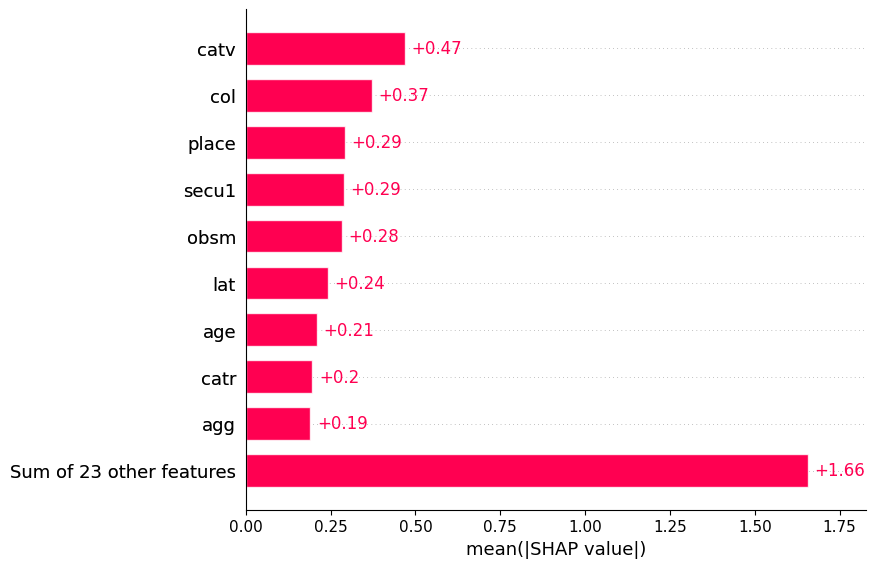

In [127]:
# Vue globale : importance moyenne des variables
shap.plots.bar(shap_values)

* Nous obtenons les variables qui ont beaucoup contribué en moyenne pour la prédiction de ce modèle (binaire) sur l'ensemble du test.
*  place est la variable la plus influente, suivie de obsm et col.
*  Cela signifie que la position dans le véhicule, l’obstacle mobile et le type de collision sont souvent déterminants pour juger si un accident est grave.

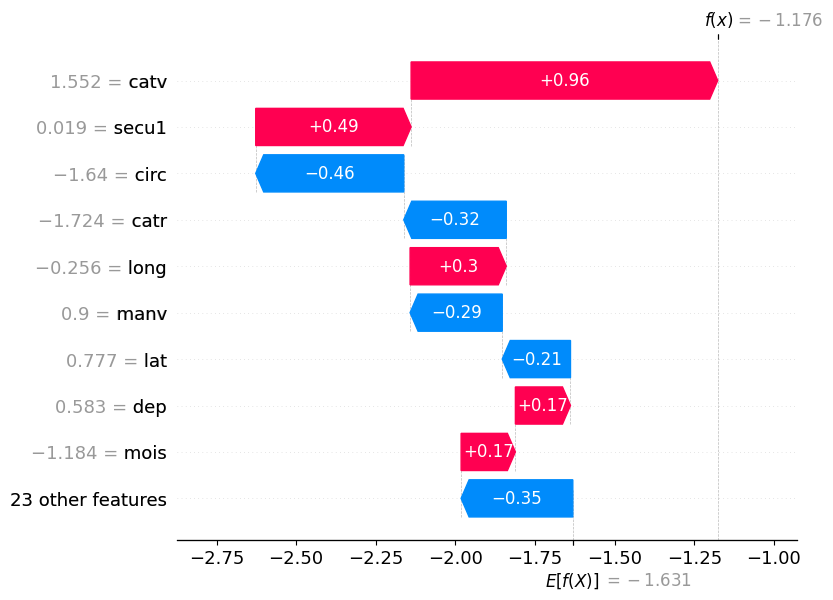

In [128]:
# Prédiction individuel pour l'observation i
i = 0

shap.plots.waterfall(shap_values[i])

* Le modèle a bien prédit pour l'individu 0, avec classe réelle et prédicte comme étant une blessure **Non grave**.

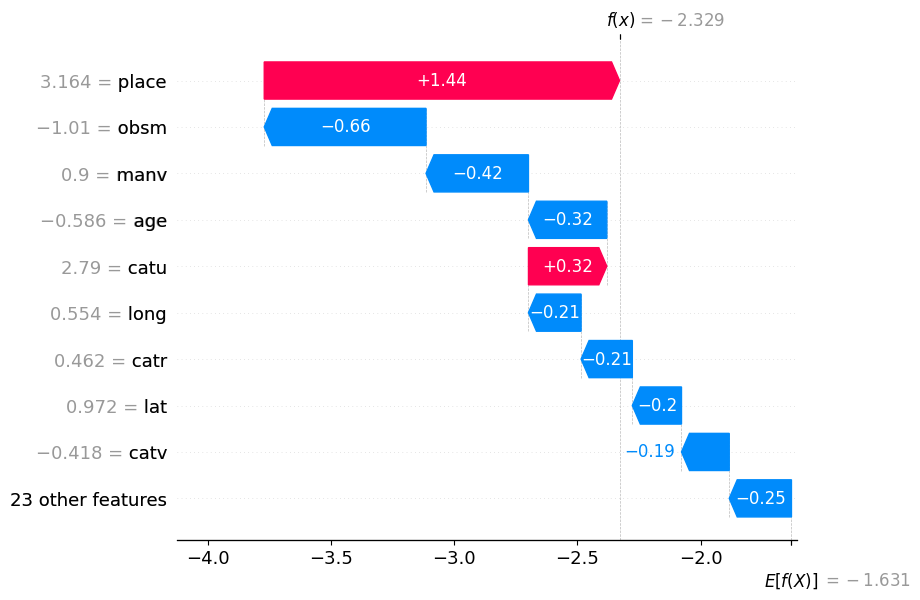

In [129]:
# Prédiction individuel pour l'observation i
i = 5

shap.plots.waterfall(shap_values[i])

* place joue fortement en faveur de Blessure "Non Grave", mais ce signal a été contrebalancé par plusieurs autres :

    * obsm, manv, lat, catr, agg... qui tirent tous la prédiction vers Grave.
    * Il manque aussi la variable heure qui avait poussé la prédiction à **Non grave**

**Hypothèse :**
Cela pourrait expliquer pourquoi le modèle n’a pas "vu" certains signes de gravité.

**Conclusion :**

Le modèle a surestimé l’effet de place dans le sens Non grave.

Cela a écrasé les nombreux autres signaux négatifs (vers "Grave").

C’est typiquement une erreur due à un déséquilibre local des poids SHAP : une variable surpondérée fait basculer le modèle.

### ALLER PLUS LOIN

**Étapes pour afficher les SHAP values pour la classe "Grave" (classe 1) qui correspond à la vérité réelle**

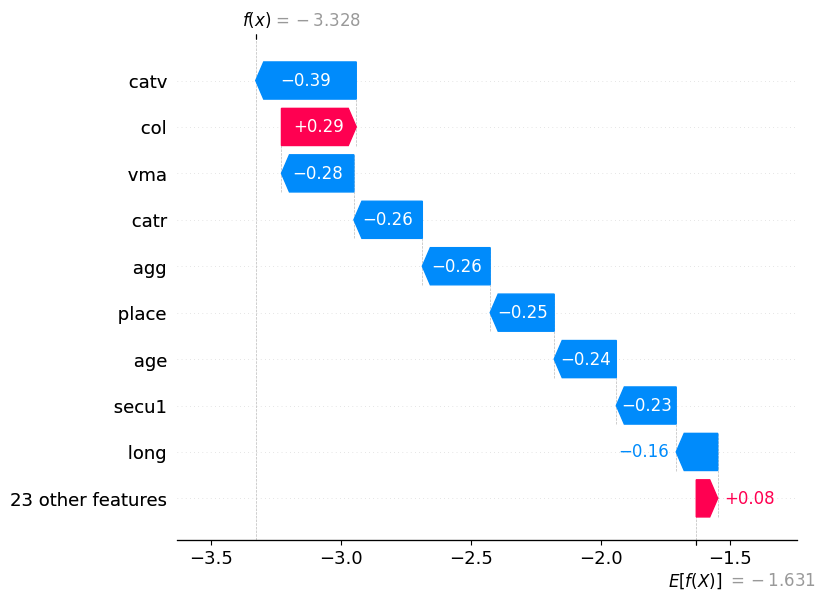

In [130]:
import shap

# déjà ton explainer SHAP :
explainer = shap.TreeExplainer(best_modelb)

# Pour le modèle binaire en sortie logit :
shap_values = explainer.shap_values(X_test)

# Pour la classe "Grave" en supposons que c’est l’indice 1
shap_values_grave = shap_values[1]

# Index de l'observation à analyser (exemple : observation 5)
i = 5

# Affichage du waterfall plot pour l’observation i et la classe Grave              
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value, 
    shap_values_grave, 
    feature_names=X_test.columns, 
    features=X_test.iloc[i]
)

* Pour l’individu n°5, la classe prédite par le modèle est "Non grave", alors que la classe réelle est "Grave" (faux négatif).

* Nous avons utilisé SHAP pour analyser la contribution des variables vers la classe "Grave" (et non celle prédite).

* Le graphique SHAP montre que certaines variables (ex : col qui correspond au type de collision) ou les facteurs qui poussent d’appartenir à la classe "Grave", mais d'autres (ex : place, catv, vma, secu1) ont eu un effet inverse. Leur influence cumulée n’a pas suffi à faire prédire correctement la gravité réelle par le modèle.

* Le modèle a sous estimé le type de collision qui est de type frontale (réelle) pour l'individu 5, ce qui peut indiquer un faux négatif.

# Conclusion

**Les modèles de Machine Learning, en particulier XGBoost et Random Forest, offrent de meilleures performances prédictives que le GLM, notamment sur la classification binaire.**
**Cependant, leur interprétation est plus complexe, ce qui justifie l’usage des outils SHAP et LIME.**
**Les résultats confirment l’importance de certaines variables clés : place, obstacle, la localisation, l'équipement, heure de l’accident, type d’usager, manœuvre, âge du conducteur, etc.**
**Les modèles montrent une bonne capacité à prédire les cas graves, même si des erreurs subsistent sur les classes intermédiaires.**

**L’approche combinée statistique + machine learning permet à la fois :**

* **d’identifier des facteurs explicatifs solides avec le GLM,**
* **et de maximiser la performance prédictive avec les modèles de Machine Learning.**

**Cette double approche renforce la robustesse de l’analyse pour orienter des actions de prévention routière ciblées.**

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">Mame Diarra DABO, Kaouther Malika DECHICHA, Houda OUADAH </h1> 
<hr style="border-width:2px;border-color:#75DFC1">